In [1]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
176                                                         0                       NaN     NaN                       NaN    70.0        161.0  27.005131                                NaN                                    NaN           NaN                      82.0    0.0                    91.0               0.901099             1.0              1.0                   0.509317       1.0                                                       1.0                              0.0                           NaN                                             NaN                                              NaN   0.0        0.0                                                         NaN               NaN           NaN             0.0                             6.6975                             5.535         12.2325                                  2.0                  0.0                      NaN                        NaN                     NaN             NaN          8.17   
540                                                         1                     268.0     NaN                       NaN    79.0        181.0  24.114038                              139.0                                   92.0           0.0                       NaN    NaN                     NaN                    NaN             NaN              NaN                        NaN       NaN                                                       0.0                              1.0                           1.0                                             1.0                                              1.0   1.0        0.0                                                         NaN               1.0           NaN             NaN                             5.3648                             4.311          9.6758                                  NaN                  NaN                 3.251664                     3.2100                6.461664             NaN          7.58   
484                                                         1                     151.0   18.83                       NaN    97.0        169.0  33.962396                              139.0                                   80.0           0.0                     108.0    1.0                   108.0               1.000000             1.0              1.0                   0.639053       1.0                                                       2.0                              1.0                           0.0                                             1.0                                              1.0   0.0        0.0                                                         0.0               0.0           1.0             0.0                             7.1440                             5.083         12.2270                                  0.0                  1.0                11.790000                     8.0000               19.790000             0.0          7.98   
274                                                      

In [3]:
df.loc[(df[PCO] != 0) & (df[PCO] != 4), PCO] = np.nan

#  change all 4s to 1s for the need of the visualisation algorithm
df[PCO] = np.where(df[PCO] == 4, 1, df[PCO])

CLASS_NAMES = ['healthy', 'High Andro']

In [4]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

(317, 135)


<Axes: >

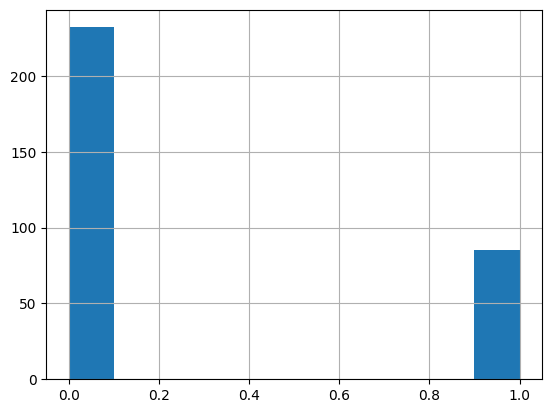

In [5]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

## Best preprocessing

### For SMOTE

In [6]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [7]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [8]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}
Best score (f1_weighted): 0.7347566225683781


params  mean_train_score  mean_test_score
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.873122         0.734757
8   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.869390         0.733084
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.877597         0.732047
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.903198         0.729150
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.873033         0.729040
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.877597         0.728640
16  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.903873         0.728432
5   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.873122         0.728190
6   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.868284         0.726028
21  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.925180         0.725643
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.877597         0.724131
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.915580         0.723029
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.868284         0.722522
24  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.916246         0.719005
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.903248         0.717629
10  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.921347         0.715662
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.912264         0.714455
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.924676         0.714062
14  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.912985         0.713964
12  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.914410         0.710076
18  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.940576         0.707884
9   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.

In [11]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [15:19<00:00,  9.28s/it]


cv_score
18 -0.493617
64 -0.504952
75 -0.507124
45 -0.509694
55 -0.509711

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 2}
Best score (f1_weighted): 0.715119149273523


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


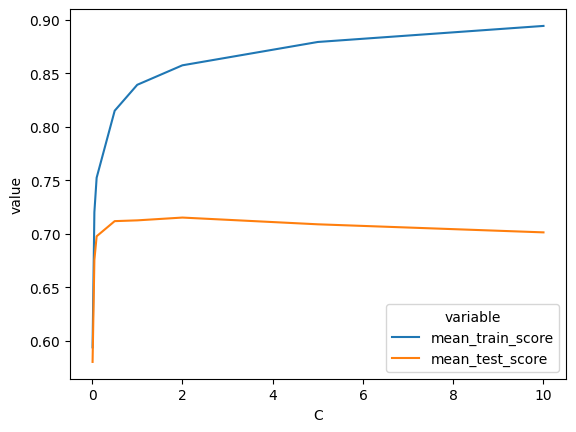

C  mean_train_score  mean_test_score
0  0.01          0.593938         0.580321
1  0.05          0.720085         0.675474
2   0.1          0.752316         0.697647
3   0.5          0.814890         0.711791
4     1          0.839098         0.712511
5     2          0.857298         0.715119
6     5          0.879089         0.708827
7    10          0.894077         0.701297

In [12]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.1

### Random Forest

In [72]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.913822         0.782616
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.928839         0.780565
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.948672         0.780479
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.930861         0.778460
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.948119         0.778261
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.929055         0.778234
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.915132         0.777261
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.947720         0.775780
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.912644         0.774311

In [12]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [19:35<00:00, 11.88s/it]


cv_score
25  -0.39638
56 -0.398133
70 -0.399275
94 -0.402765
98 -0.405842

### SVM

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

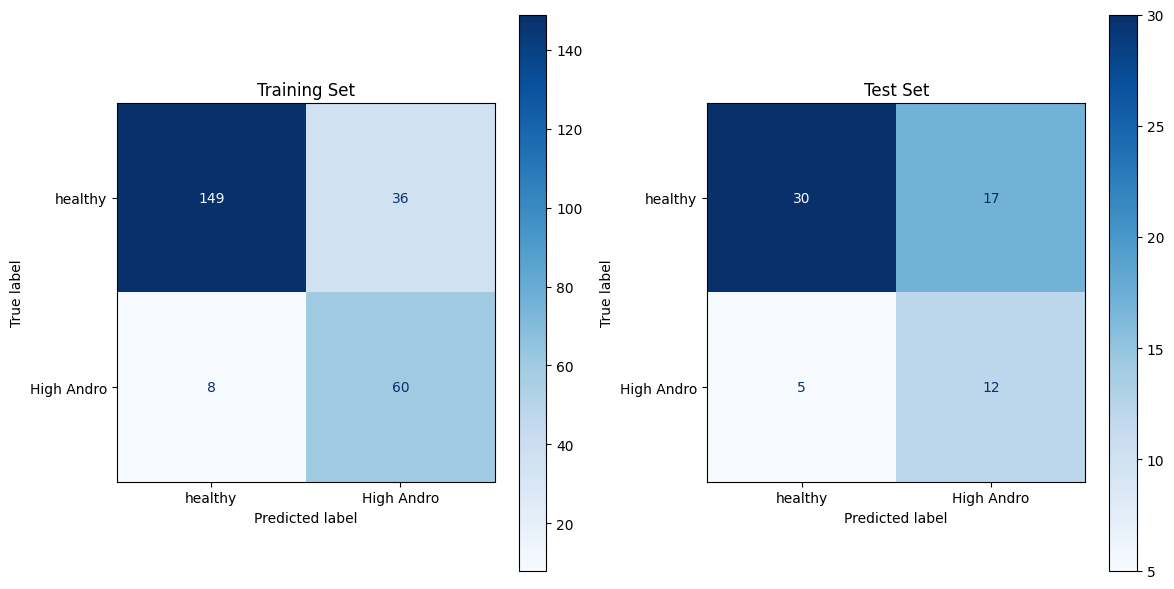

Training set
              precision    recall  f1-score   support

     healthy       0.95      0.81      0.87       185
  High Andro       0.62      0.88      0.73        68

    accuracy                           0.83       253
   macro avg       0.79      0.84      0.80       253
weighted avg       0.86      0.83      0.83       253

Test set
              precision    recall  f1-score   support

     healthy       0.86      0.64      0.73        47
  High Andro       0.41      0.71      0.52        17

    accuracy                           0.66        64
   macro avg       0.64      0.67      0.63        64
weighted avg       0.74      0.66      0.68        64



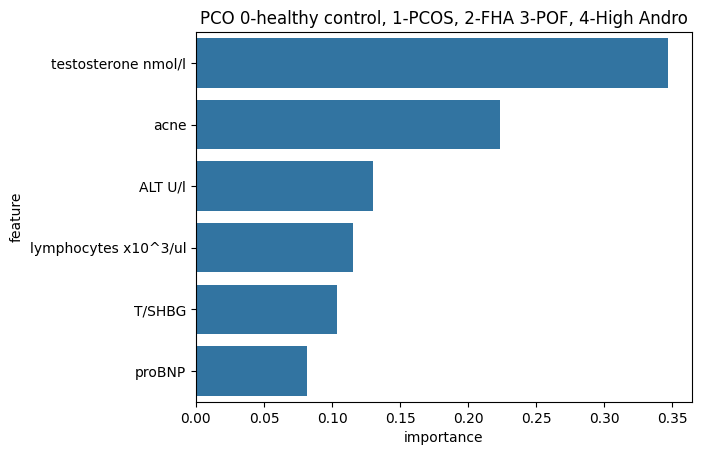

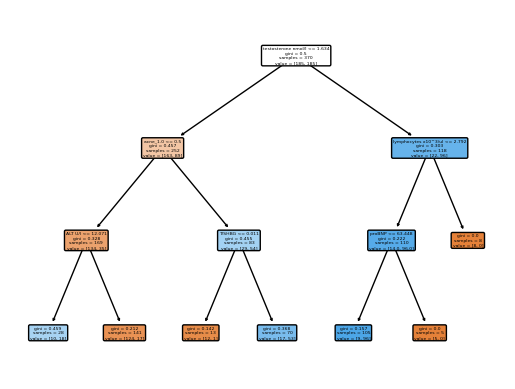

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


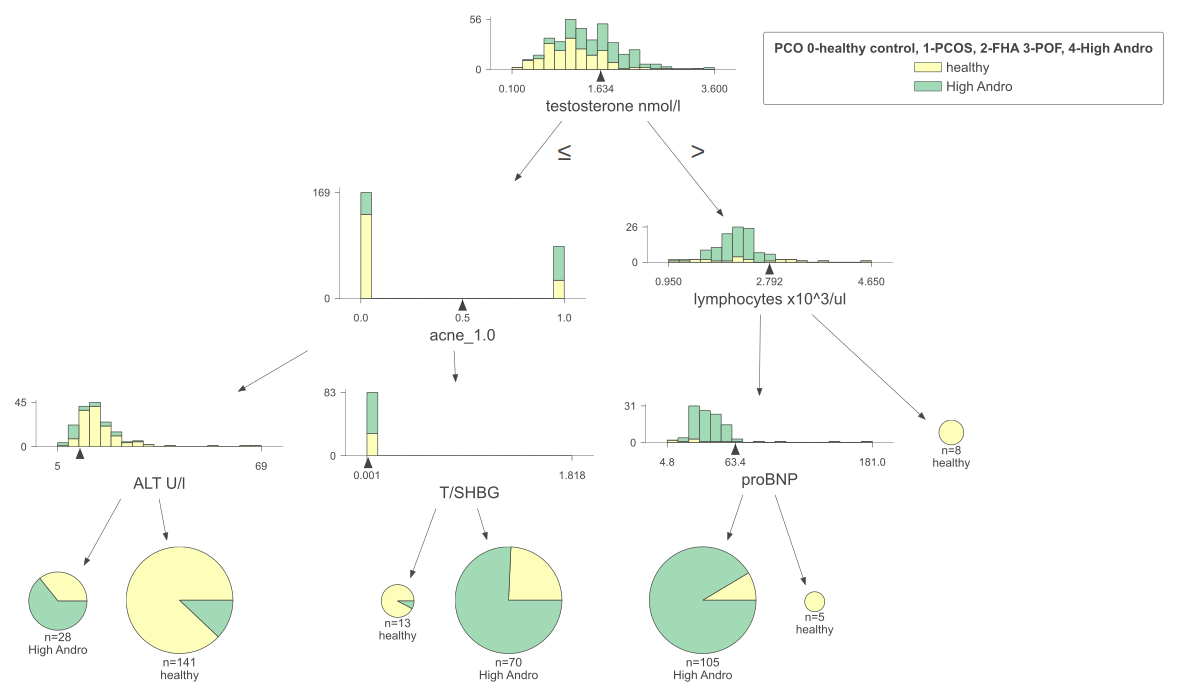

In [8]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

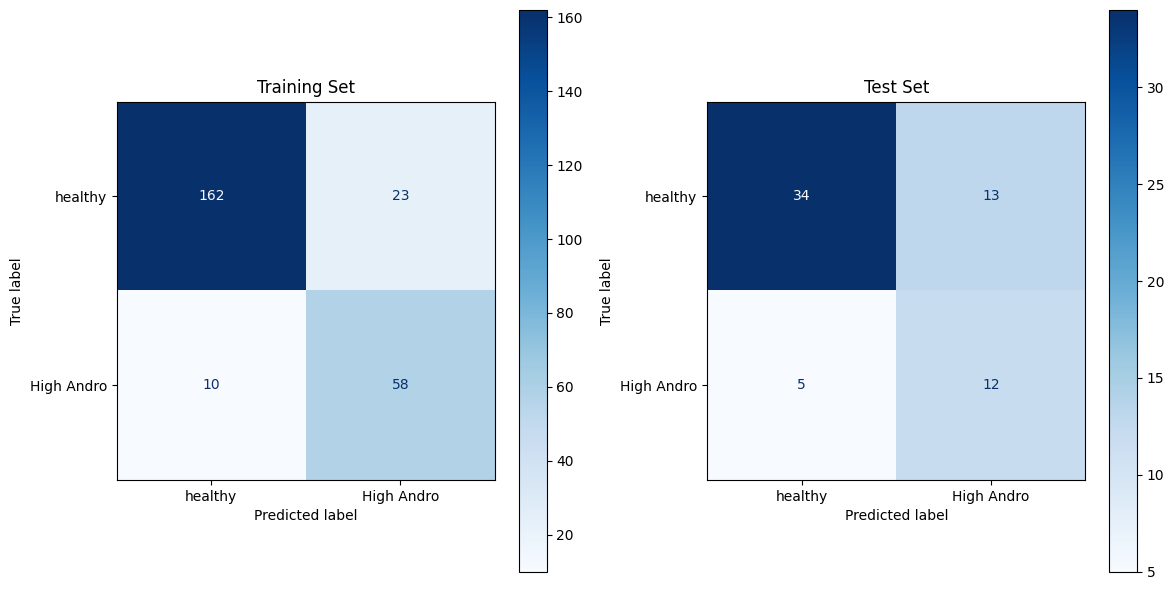

Training set
              precision    recall  f1-score   support

     healthy       0.94      0.88      0.91       185
  High Andro       0.72      0.85      0.78        68

    accuracy                           0.87       253
   macro avg       0.83      0.86      0.84       253
weighted avg       0.88      0.87      0.87       253

Test set
              precision    recall  f1-score   support

     healthy       0.87      0.72      0.79        47
  High Andro       0.48      0.71      0.57        17

    accuracy                           0.72        64
   macro avg       0.68      0.71      0.68        64
weighted avg       0.77      0.72      0.73        64



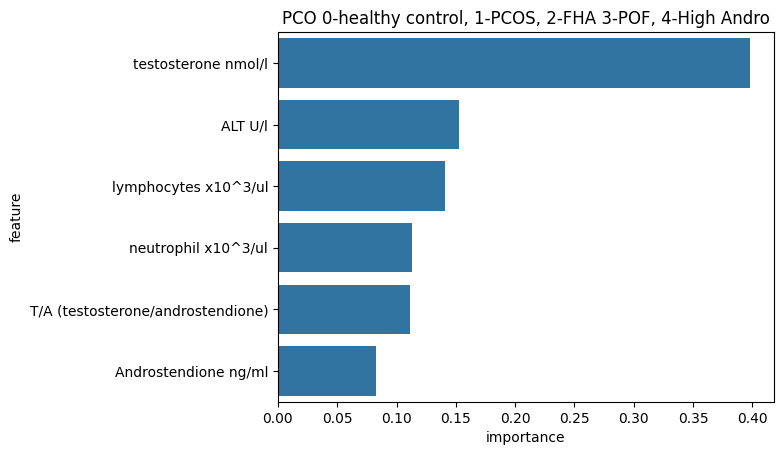

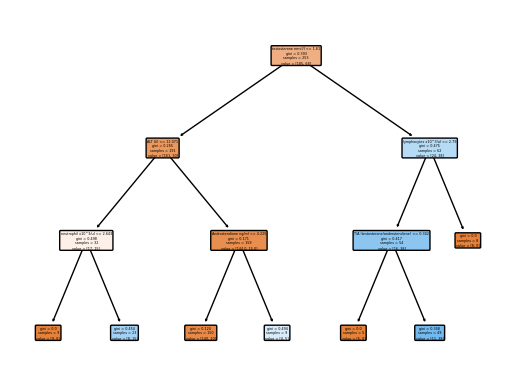

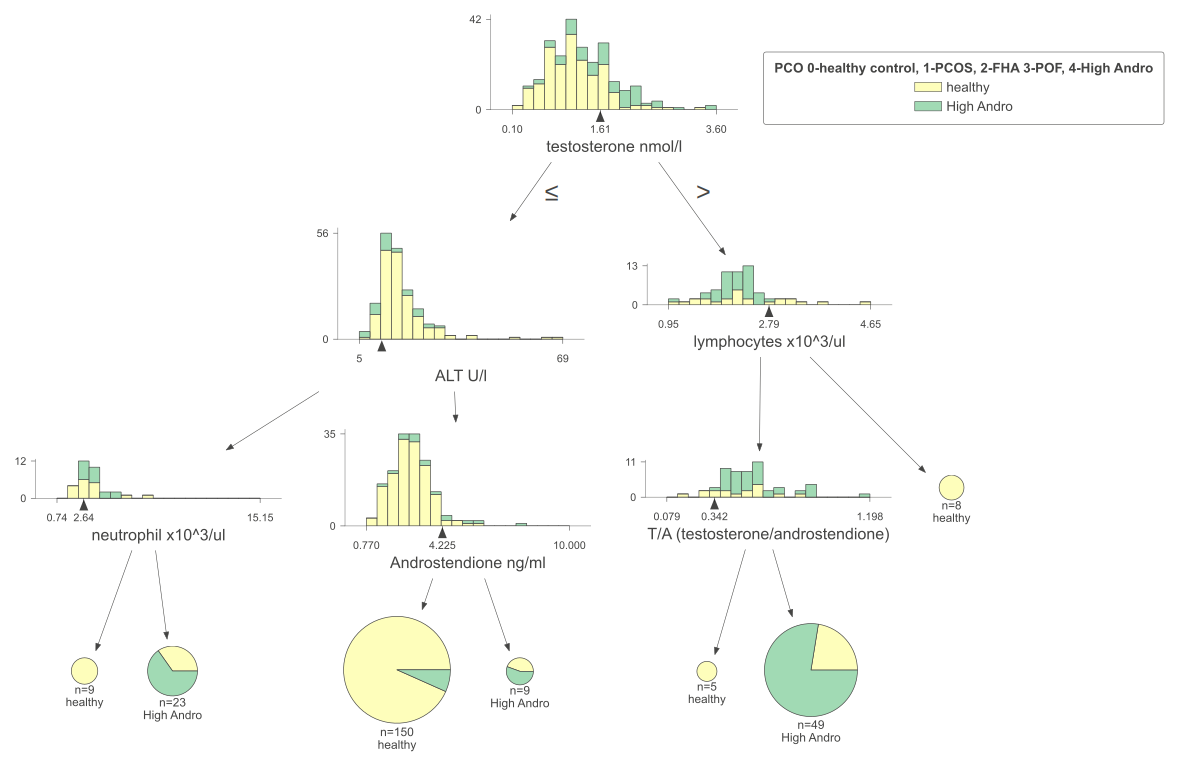

In [9]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=5, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

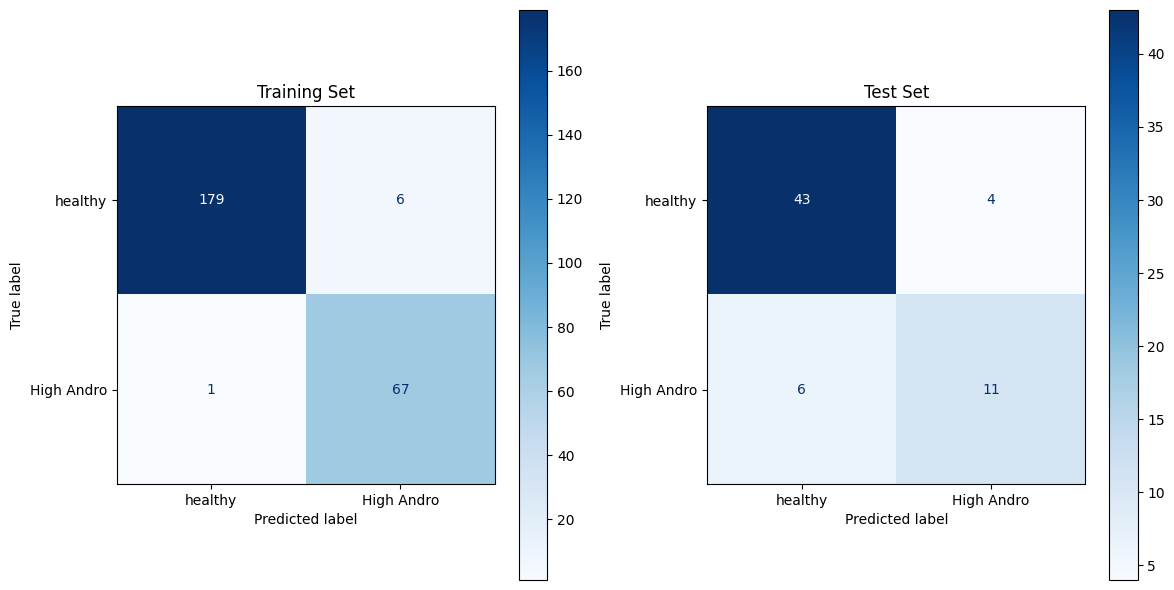

Training set
              precision    recall  f1-score   support

     healthy       0.99      0.97      0.98       185
  High Andro       0.92      0.99      0.95        68

    accuracy                           0.97       253
   macro avg       0.96      0.98      0.97       253
weighted avg       0.97      0.97      0.97       253

Test set
              precision    recall  f1-score   support

     healthy       0.88      0.91      0.90        47
  High Andro       0.73      0.65      0.69        17

    accuracy                           0.84        64
   macro avg       0.81      0.78      0.79        64
weighted avg       0.84      0.84      0.84        64



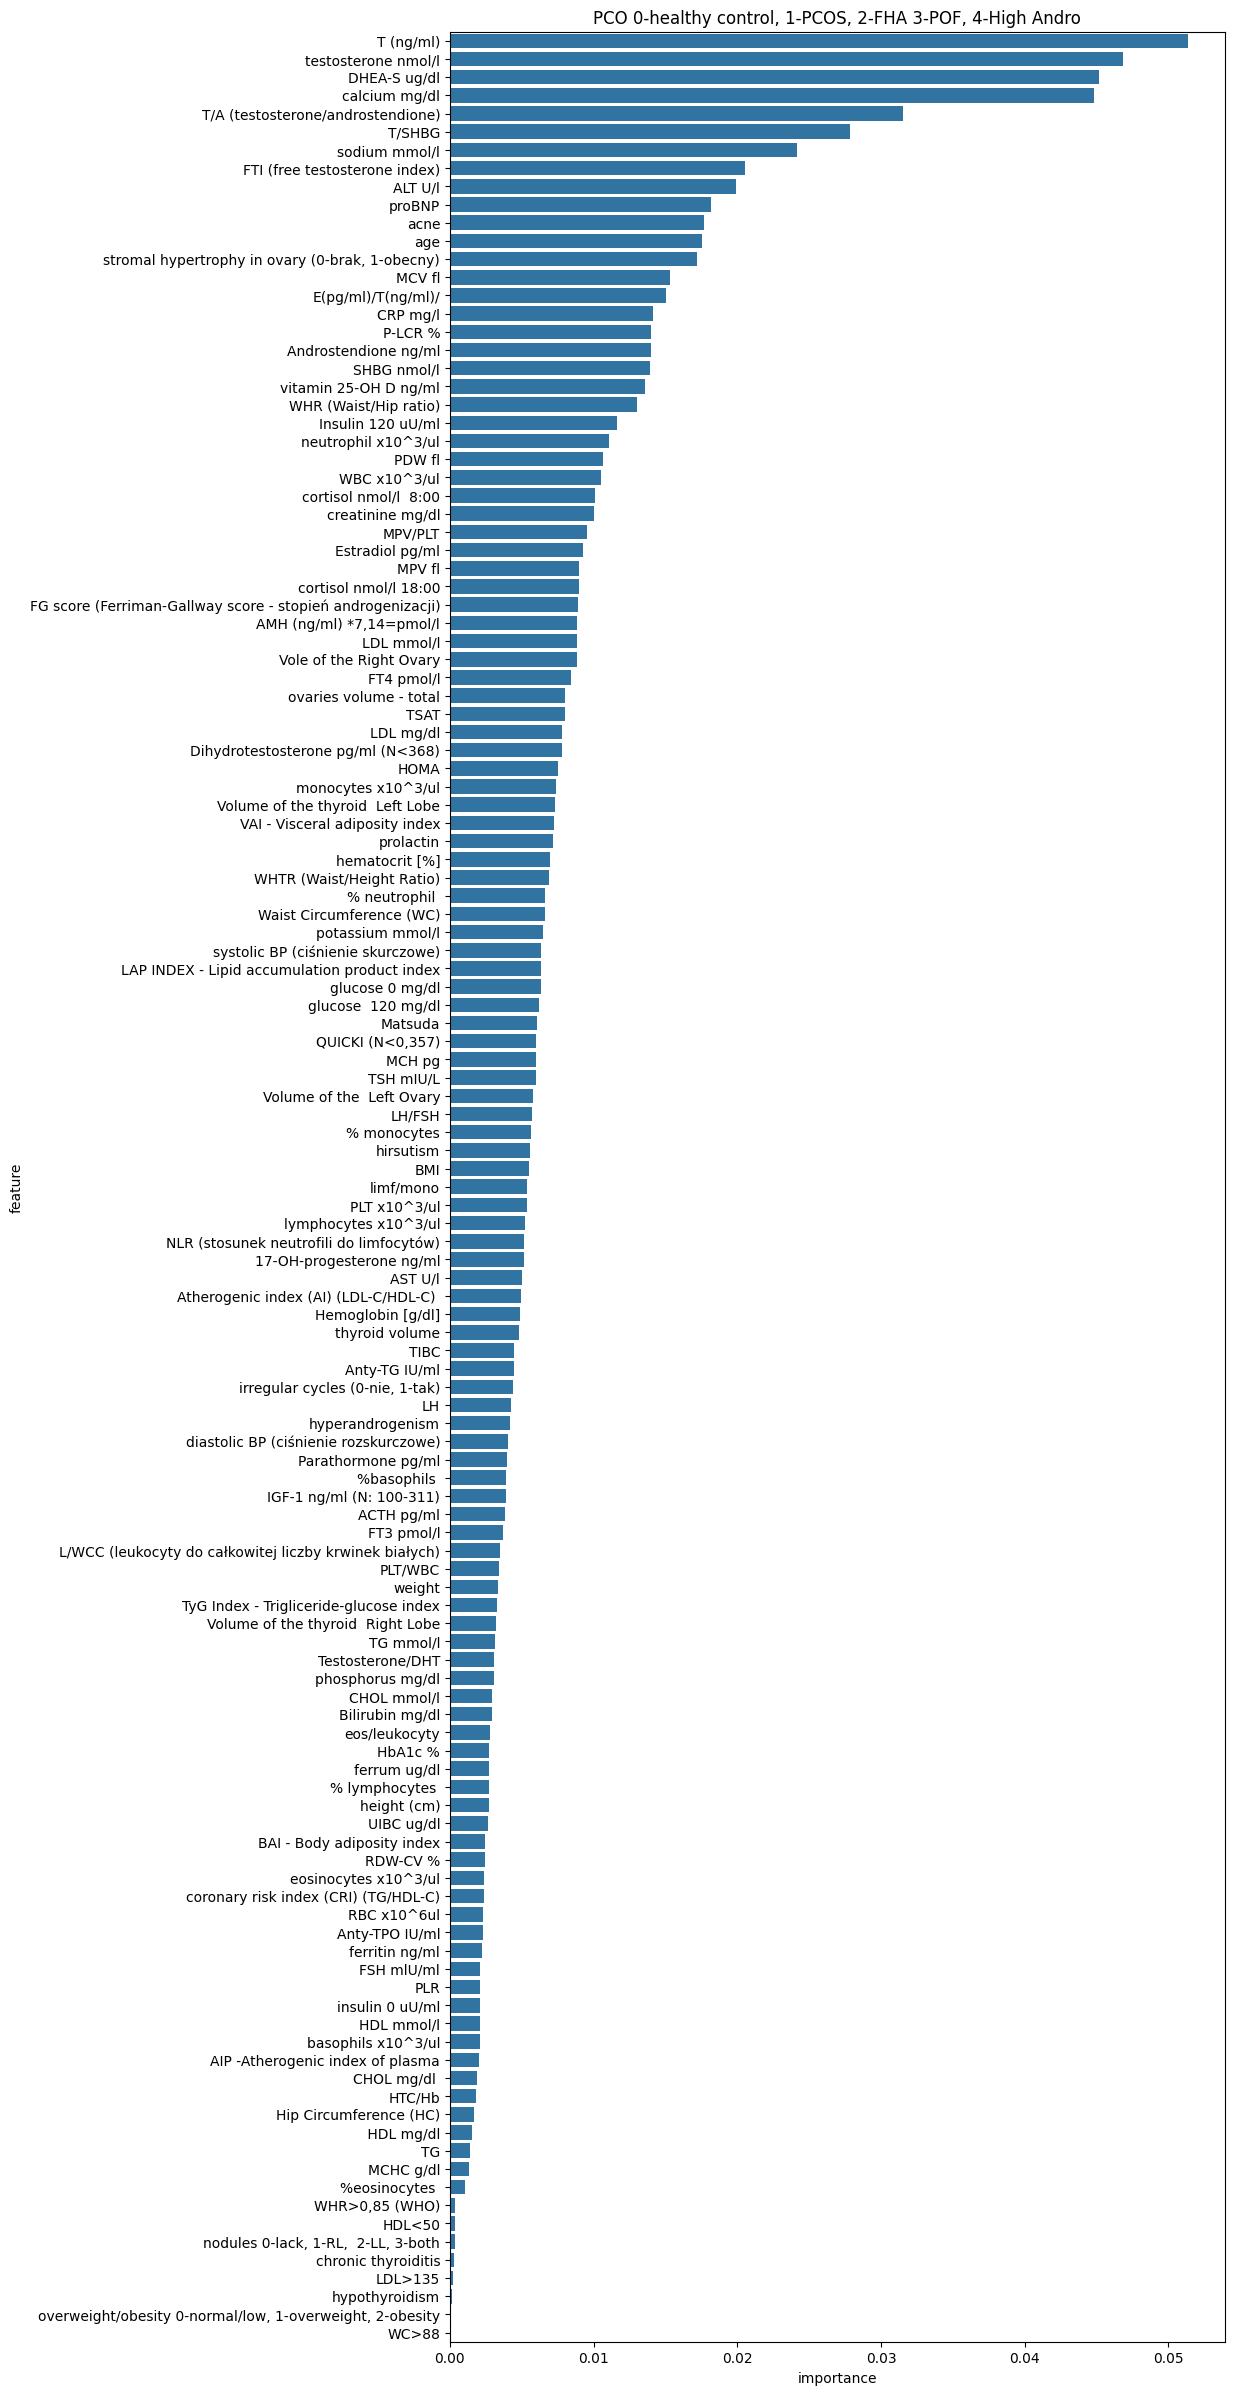

In [10]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

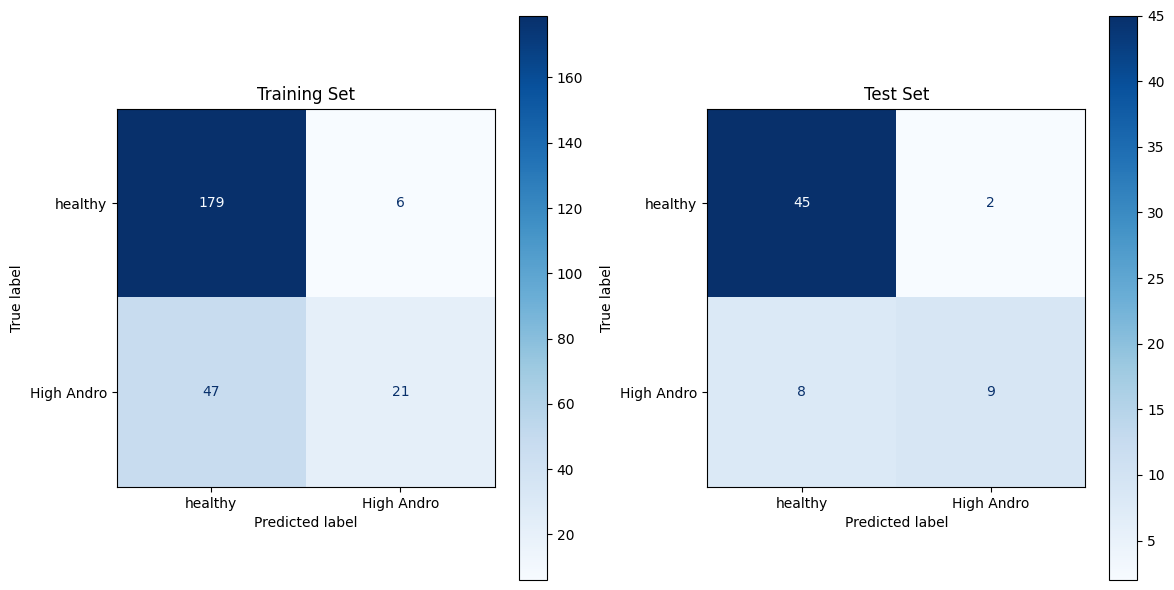

Training set
              precision    recall  f1-score   support

     healthy       0.79      0.97      0.87       185
  High Andro       0.78      0.31      0.44        68

    accuracy                           0.79       253
   macro avg       0.78      0.64      0.66       253
weighted avg       0.79      0.79      0.76       253

Test set
              precision    recall  f1-score   support

     healthy       0.85      0.96      0.90        47
  High Andro       0.82      0.53      0.64        17

    accuracy                           0.84        64
   macro avg       0.83      0.74      0.77        64
weighted avg       0.84      0.84      0.83        64



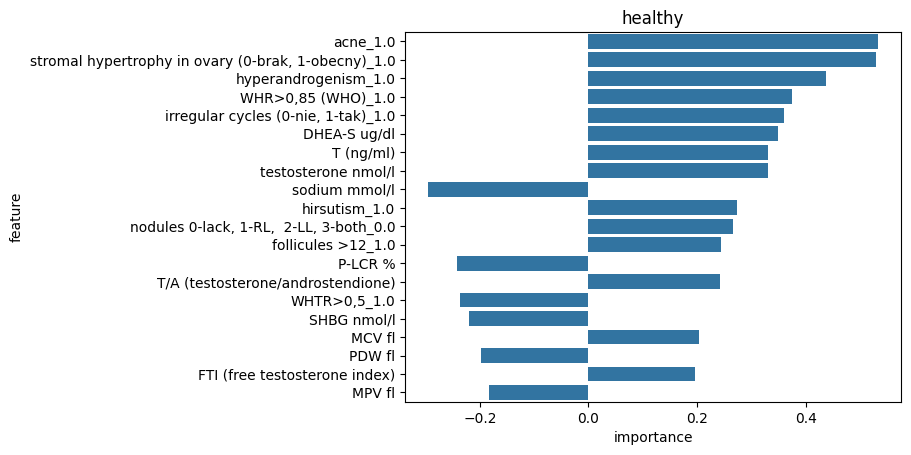

In [11]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [12]:
selected_features_map = {}

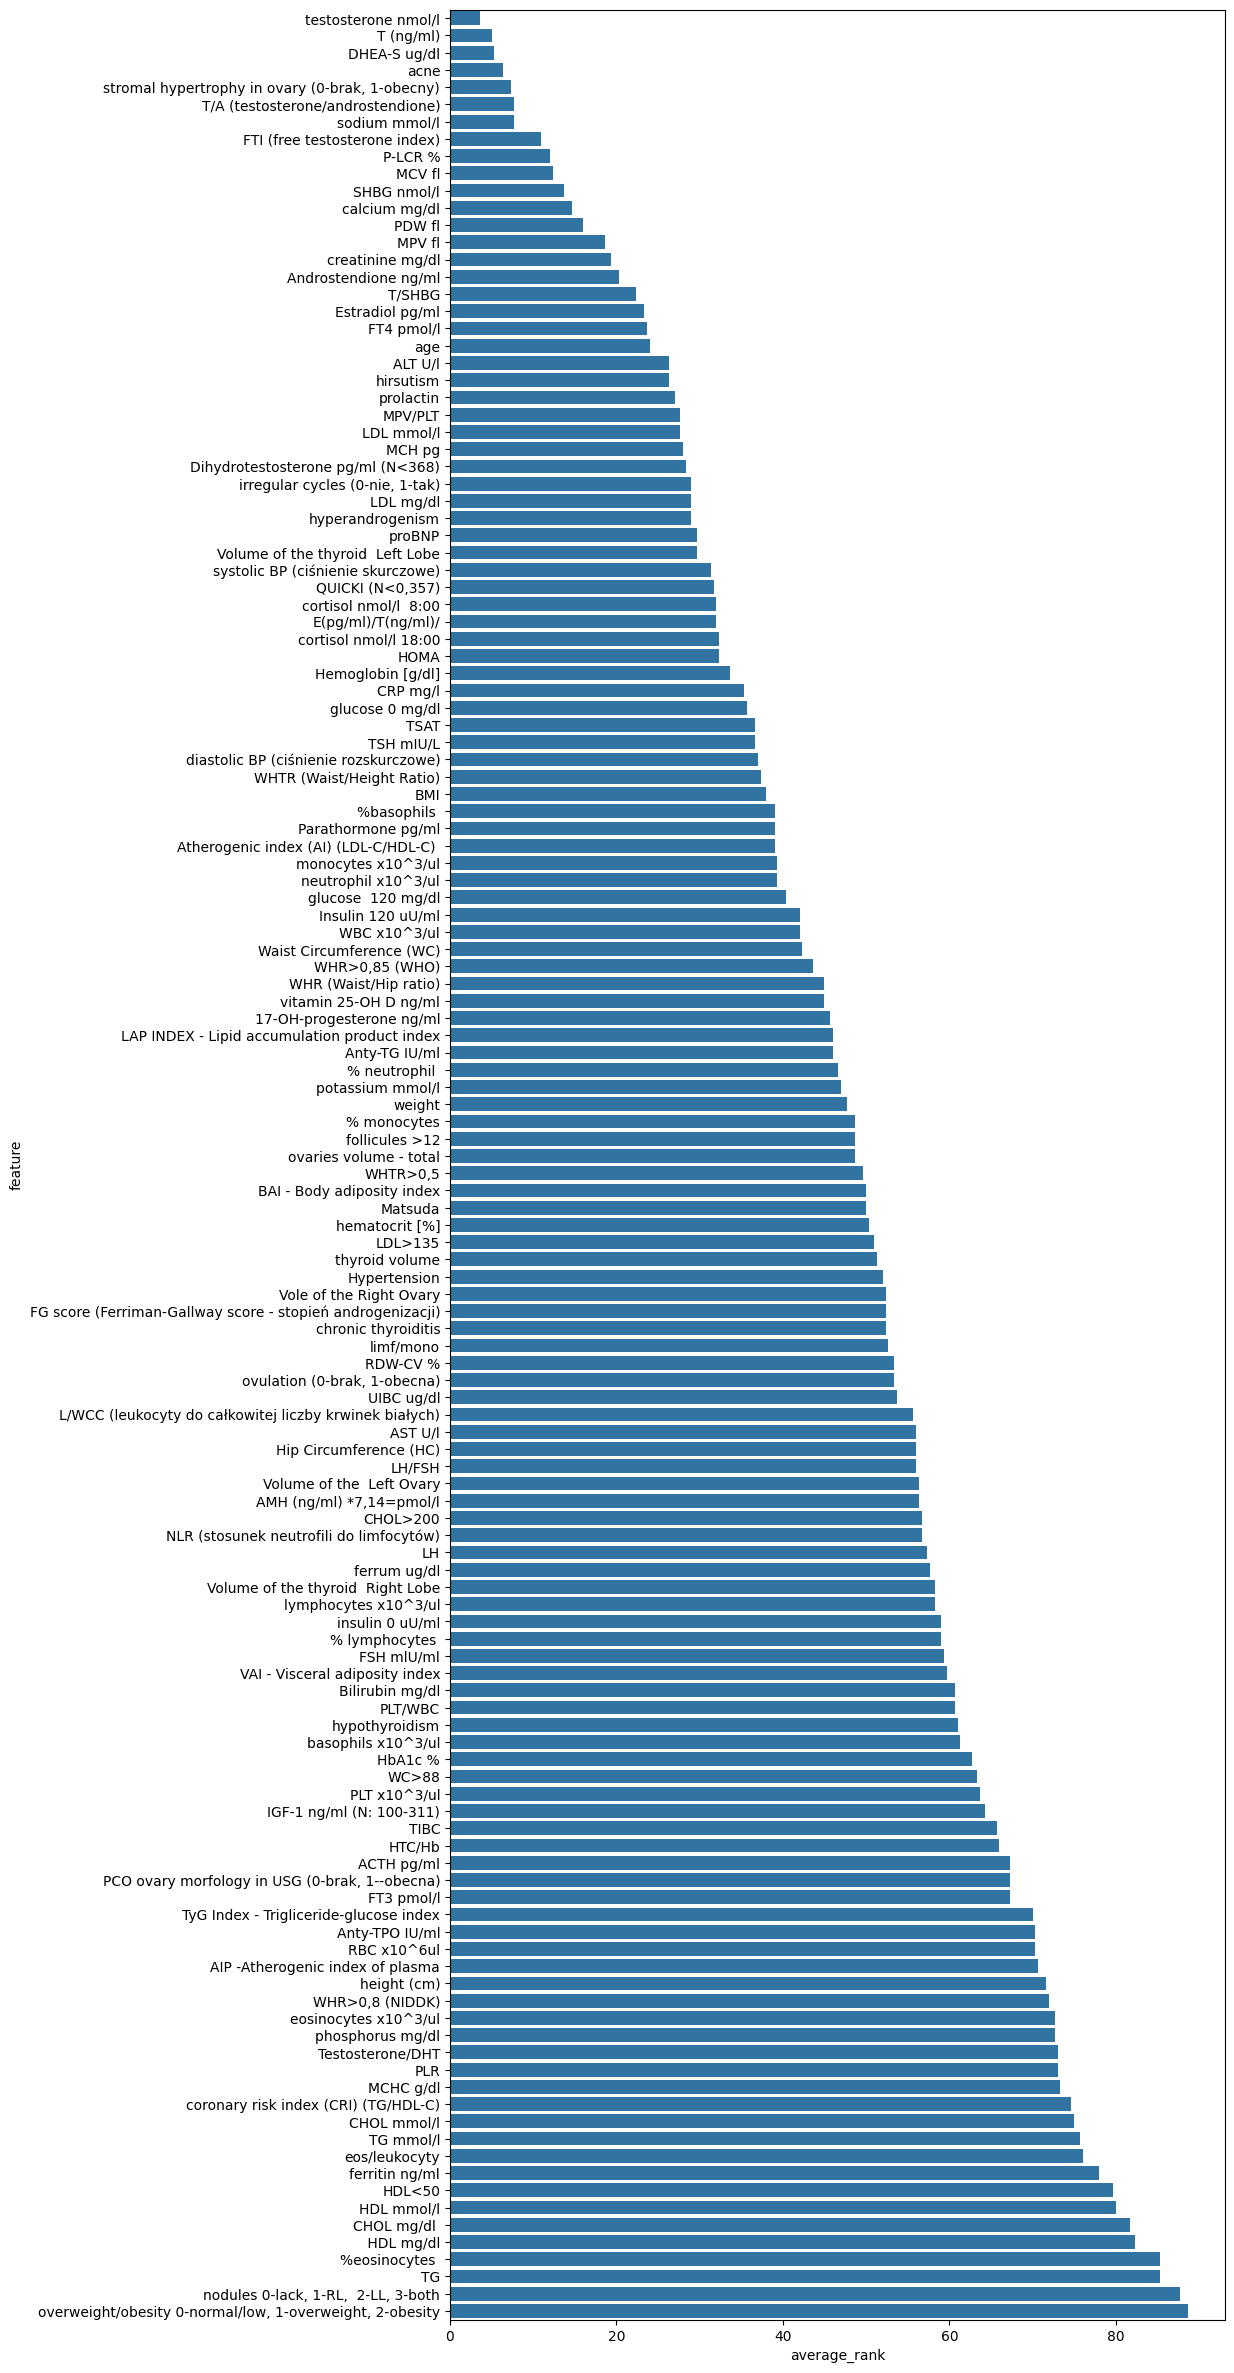

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 51 features:


['testosterone nmol/l',
 'T (ng/ml)',
 'DHEA-S ug/dl',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'FTI (free testosterone index)',
 'P-LCR %',
 'MCV fl',
 'SHBG nmol/l',
 'calcium mg/dl',
 'PDW fl',
 'MPV fl',
 'creatinine mg/dl',
 'Androstendione ng/ml',
 'T/SHBG',
 'Estradiol pg/ml',
 'FT4 pmol/l',
 'age',
 'ALT U/l',
 'hirsutism',
 'prolactin',
 'MPV/PLT',
 'LDL mmol/l',
 'MCH pg',
 'Dihydrotestosterone pg/ml (N<368)',
 'irregular cycles (0-nie, 1-tak)',
 'LDL mg/dl',
 'hyperandrogenism',
 'proBNP',
 'Volume of the thyroid  Left Lobe',
 'systolic BP (ciśnienie skurczowe)',
 'QUICKI (N<0,357)',
 'cortisol nmol/l  8:00',
 'E(pg/ml)/T(ng/ml)/',
 'cortisol nmol/l 18:00',
 'HOMA',
 'Hemoglobin [g/dl]',
 'CRP mg/l',
 'glucose 0 mg/dl',
 'TSAT',
 'TSH mIU/L',
 'diastolic BP (ciśnienie rozskurczowe)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 '%basophils ',
 'Parathormone pg/ml',
 'Atherogenic index (AI) (LDL-C/HDL-C) '

## Feature selection

### Chi 2

Selected 29 features


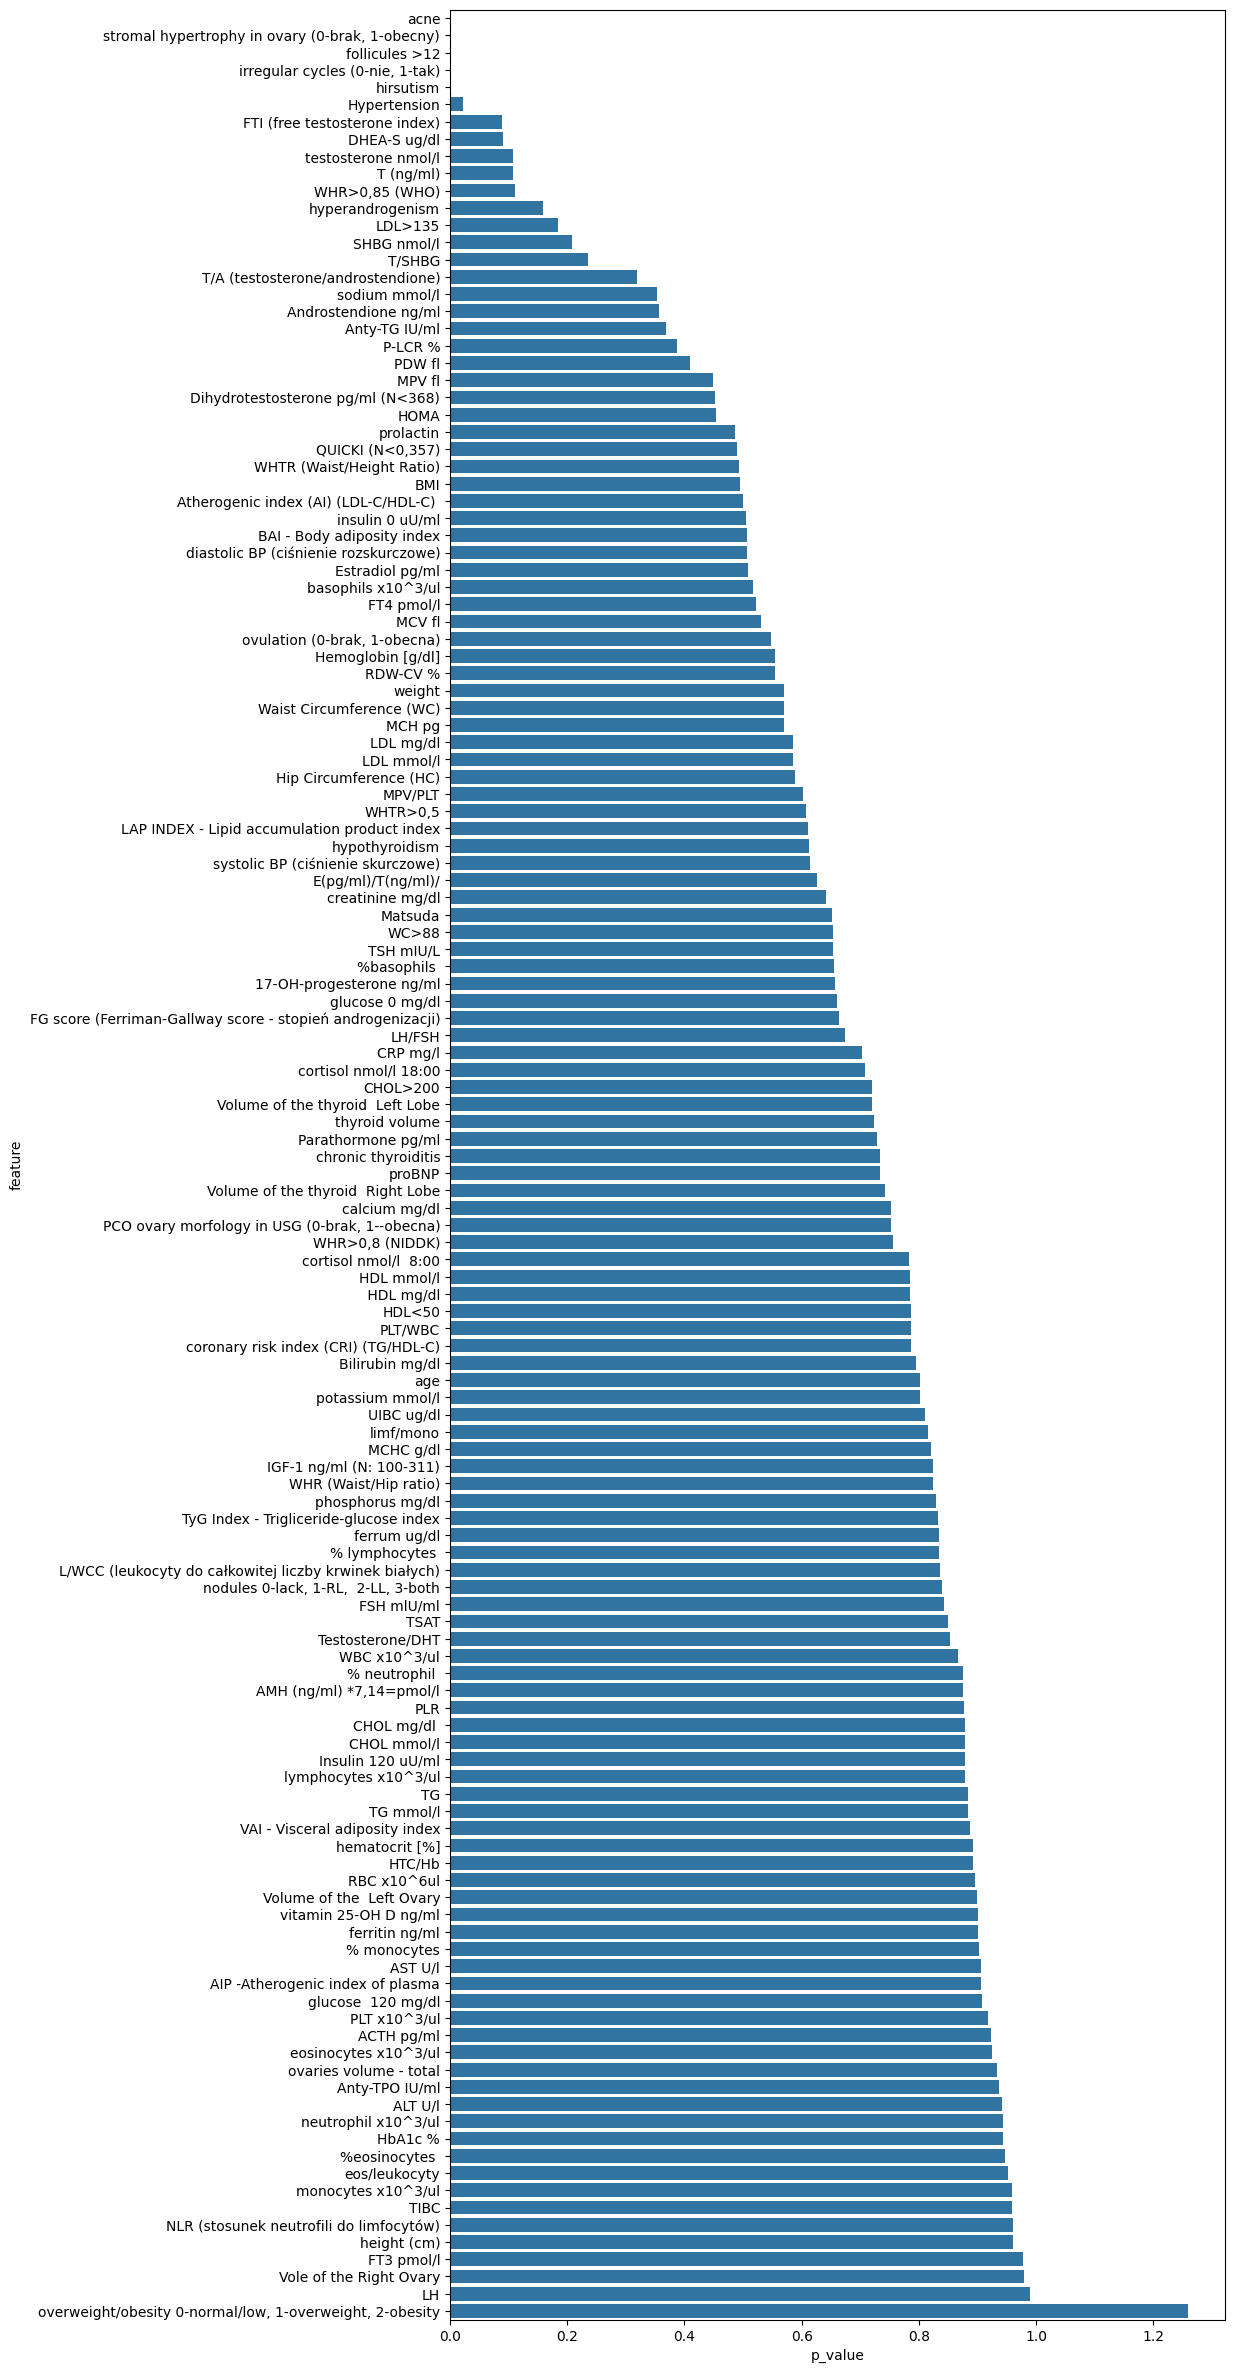

['acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'follicules >12',
 'irregular cycles (0-nie, 1-tak)',
 'hirsutism',
 'Hypertension',
 'FTI (free testosterone index)',
 'DHEA-S ug/dl',
 'testosterone nmol/l',
 'T (ng/ml)',
 'WHR>0,85 (WHO)',
 'hyperandrogenism',
 'LDL>135',
 'SHBG nmol/l',
 'T/SHBG',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'Androstendione ng/ml',
 'Anty-TG IU/ml',
 'P-LCR %',
 'PDW fl',
 'MPV fl',
 'Dihydrotestosterone pg/ml (N<368)',
 'HOMA',
 'prolactin',
 'QUICKI (N<0,357)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 'Atherogenic index (AI) (LDL-C/HDL-C) ']

In [15]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=0.5)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

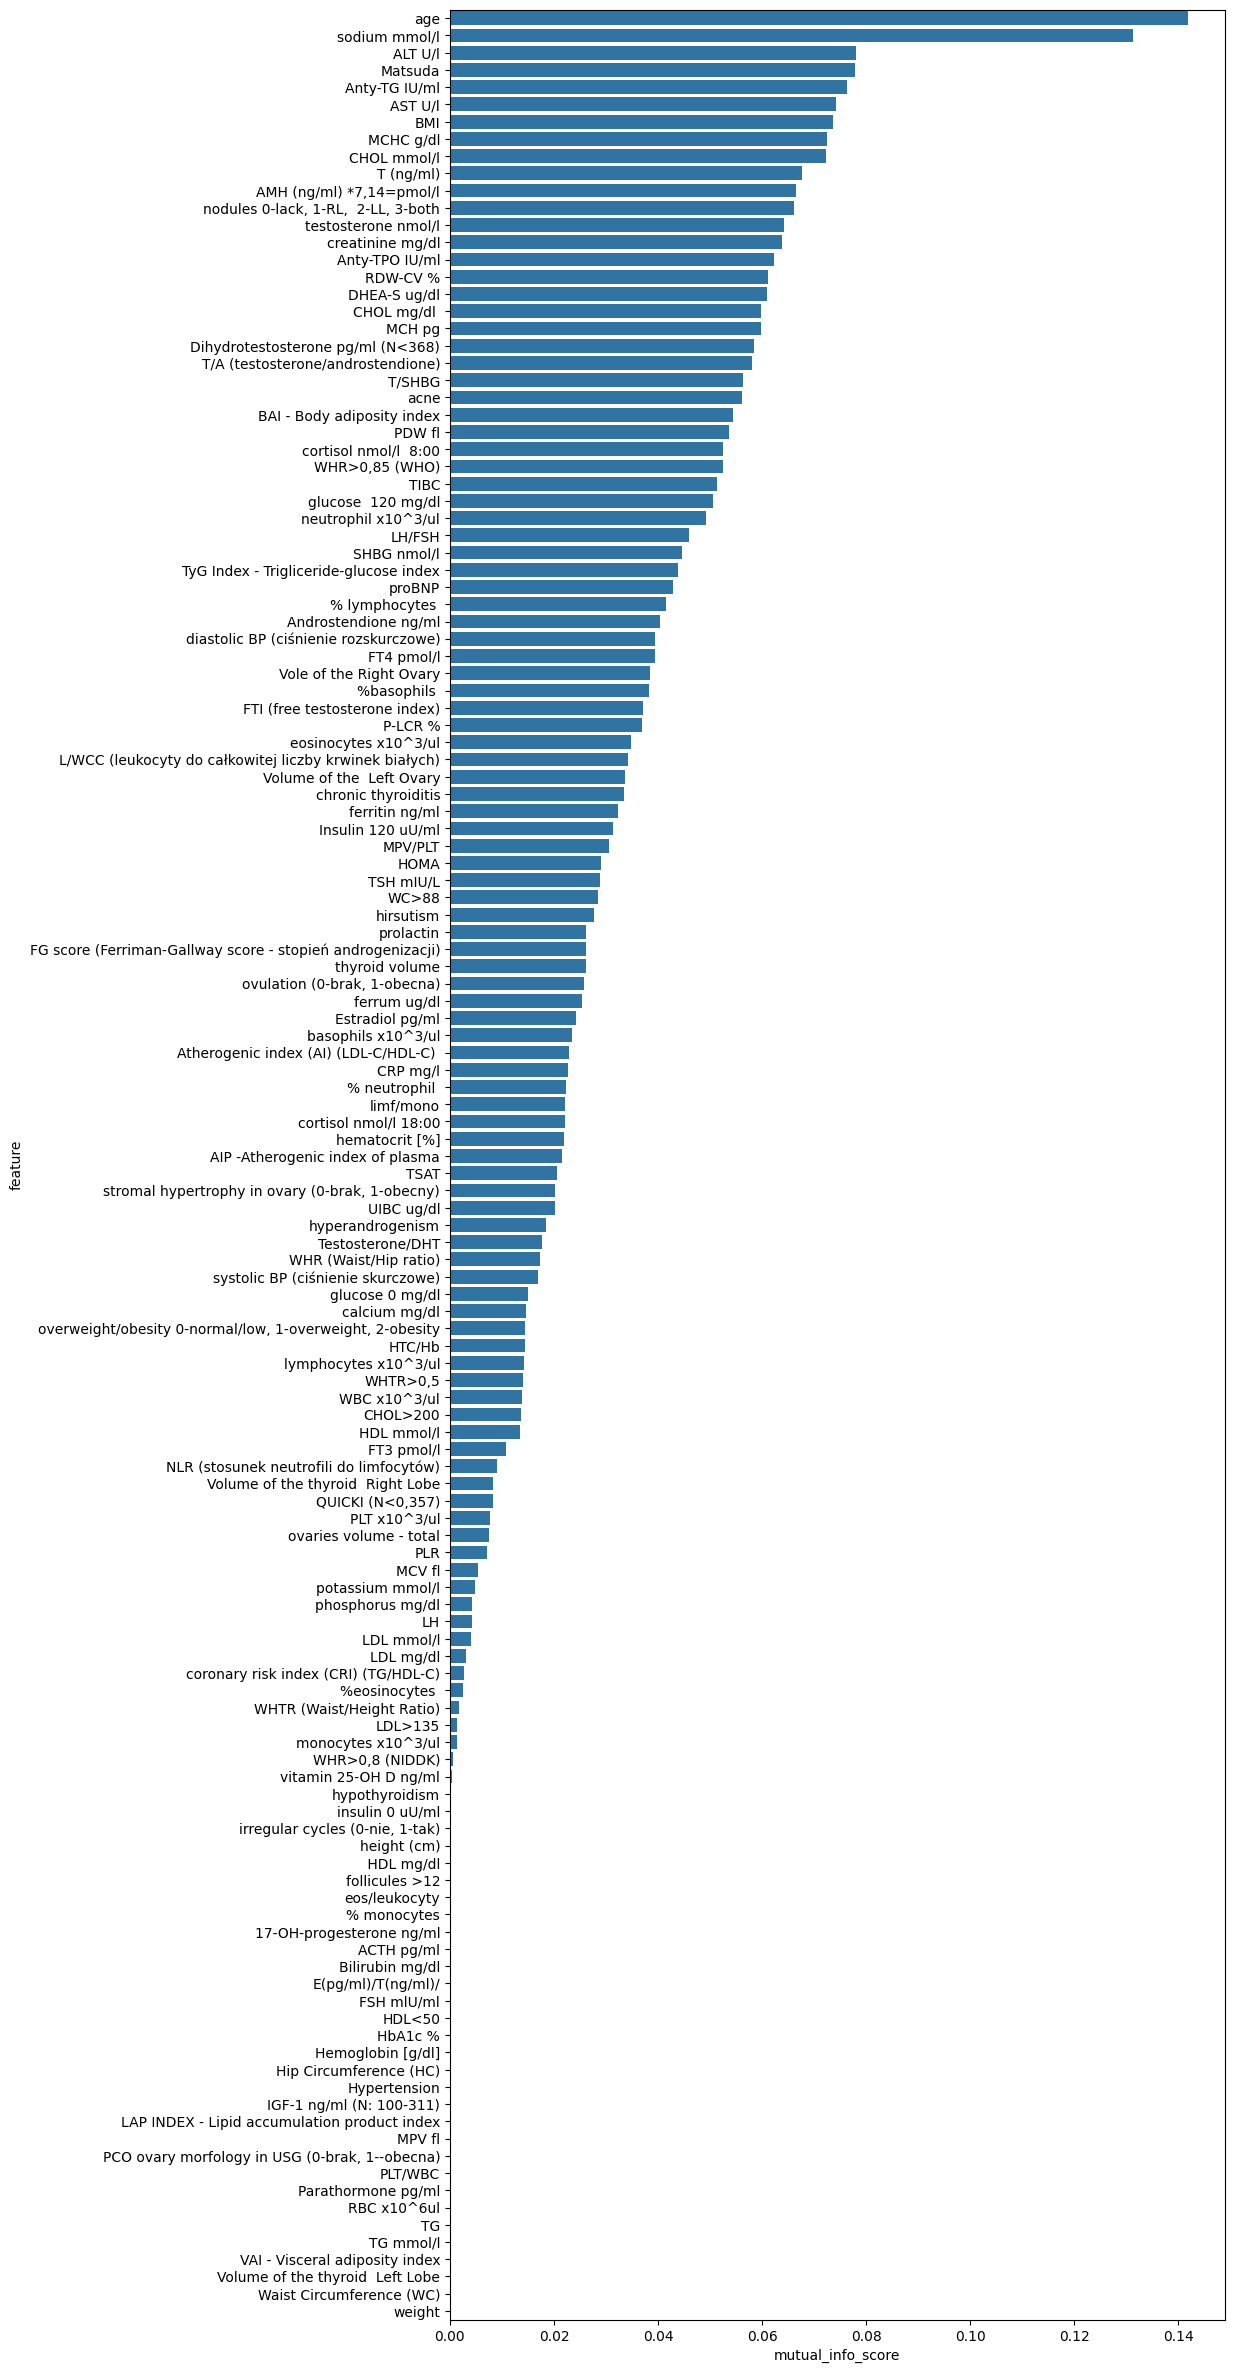

Selected 91 features


In [16]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

Optimal number of features: 55


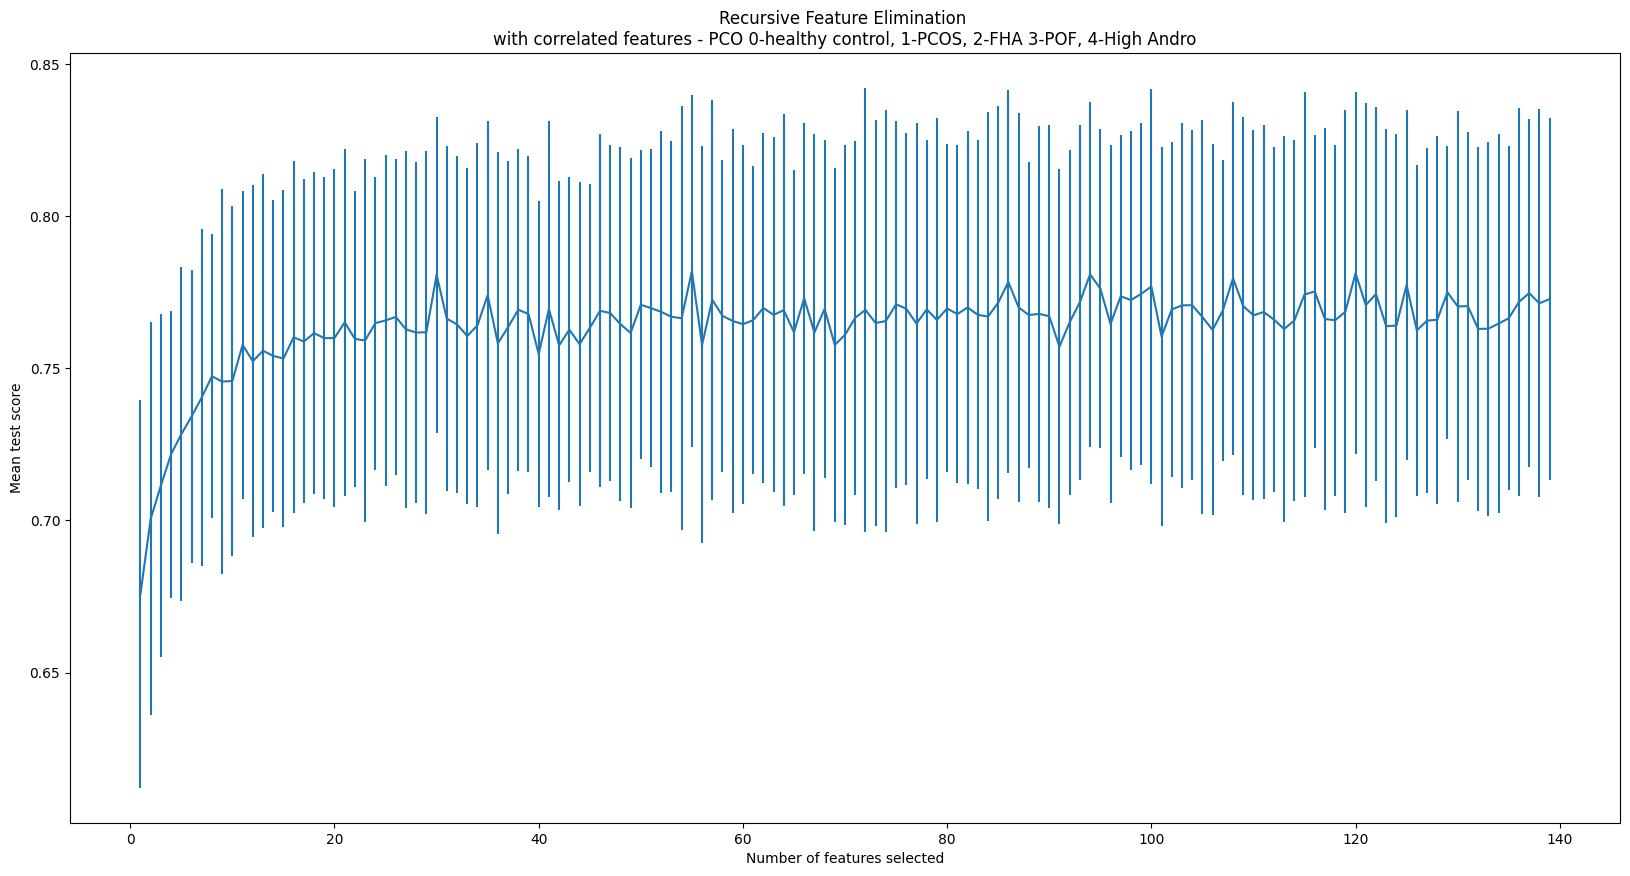

['SHBG nmol/l',
 'limf/mono',
 'Hemoglobin [g/dl]',
 'hematocrit [%]',
 'WBC x10^3/ul',
 'glucose  120 mg/dl',
 'LDL mg/dl',
 'LDL mmol/l',
 'ferrum ug/dl',
 'diastolic BP (ciśnienie rozskurczowe)',
 'LH/FSH',
 'creatinine mg/dl',
 'MCV fl',
 'MPV fl',
 'MPV/PLT',
 'HOMA',
 'Matsuda',
 'cortisol nmol/l 18:00',
 'PDW fl',
 'Parathormone pg/ml',
 'cortisol nmol/l  8:00',
 'calcium mg/dl',
 'T (ng/ml)',
 'T/A (testosterone/androstendione)',
 'T/SHBG',
 'TIBC',
 'age',
 'acne',
 'VAI - Visceral adiposity index',
 'Volume of the  Left Ovary',
 'Volume of the thyroid  Left Lobe',
 'P-LCR %',
 'lymphocytes x10^3/ul',
 'glucose 0 mg/dl',
 'FTI (free testosterone index)',
 'testosterone nmol/l',
 'systolic BP (ciśnienie skurczowe)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'AIP -Atherogenic index of plasma',
 'ALT U/l',
 'sodium mmol/l',
 'Androstendione ng/ml',
 'prolactin',
 'proBNP',
 'Bilirubin mg/dl',
 'potassium mmol/l',
 'phosphorus mg/dl',
 'WHR (Waist/Hip ratio)',
 'DHEA-S 

In [17]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

Selected 132 features


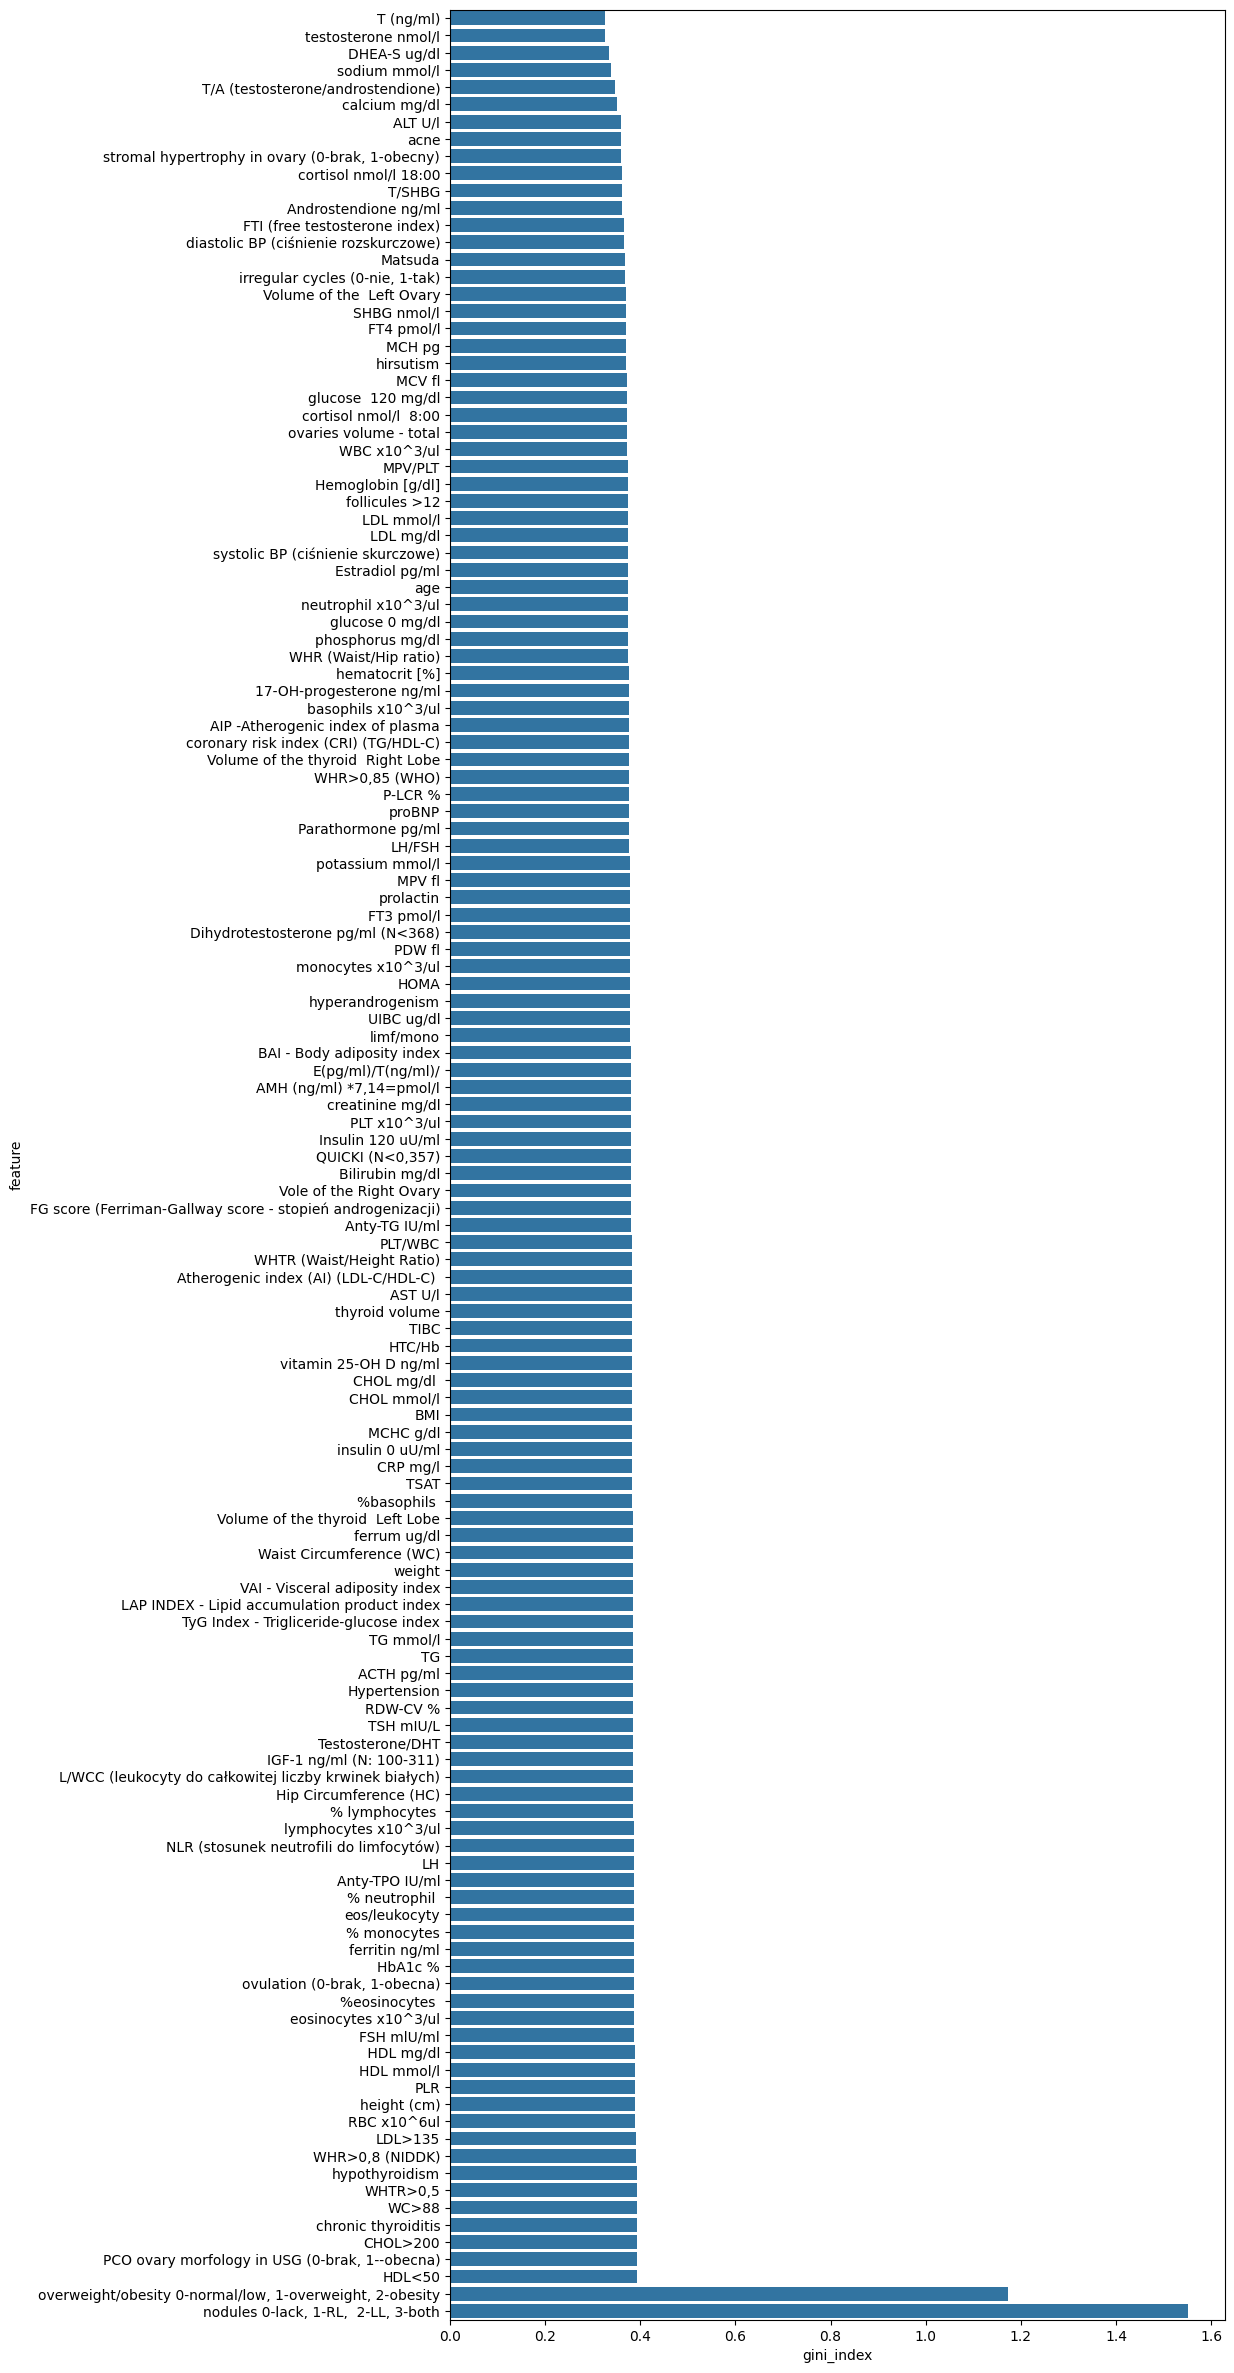

['T (ng/ml)',
 'testosterone nmol/l',
 'DHEA-S ug/dl',
 'sodium mmol/l',
 'T/A (testosterone/androstendione)',
 'calcium mg/dl',
 'ALT U/l',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'cortisol nmol/l 18:00',
 'T/SHBG',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'diastolic BP (ciśnienie rozskurczowe)',
 'Matsuda',
 'irregular cycles (0-nie, 1-tak)',
 'Volume of the  Left Ovary',
 'SHBG nmol/l',
 'FT4 pmol/l',
 'MCH pg',
 'hirsutism',
 'MCV fl',
 'glucose  120 mg/dl',
 'cortisol nmol/l  8:00',
 'ovaries volume - total',
 'WBC x10^3/ul',
 'MPV/PLT',
 'Hemoglobin [g/dl]',
 'follicules >12',
 'LDL mmol/l',
 'LDL mg/dl',
 'systolic BP (ciśnienie skurczowe)',
 'Estradiol pg/ml',
 'age',
 'neutrophil x10^3/ul',
 'glucose 0 mg/dl',
 'phosphorus mg/dl',
 'WHR (Waist/Hip ratio)',
 'hematocrit [%]',
 '17-OH-progesterone ng/ml',
 'basophils x10^3/ul',
 'AIP -Atherogenic index of plasma',
 'coronary risk index (CRI) (TG/HDL-C)',
 'Volume of the thyroid  Right Lob

In [18]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

selected 82 features


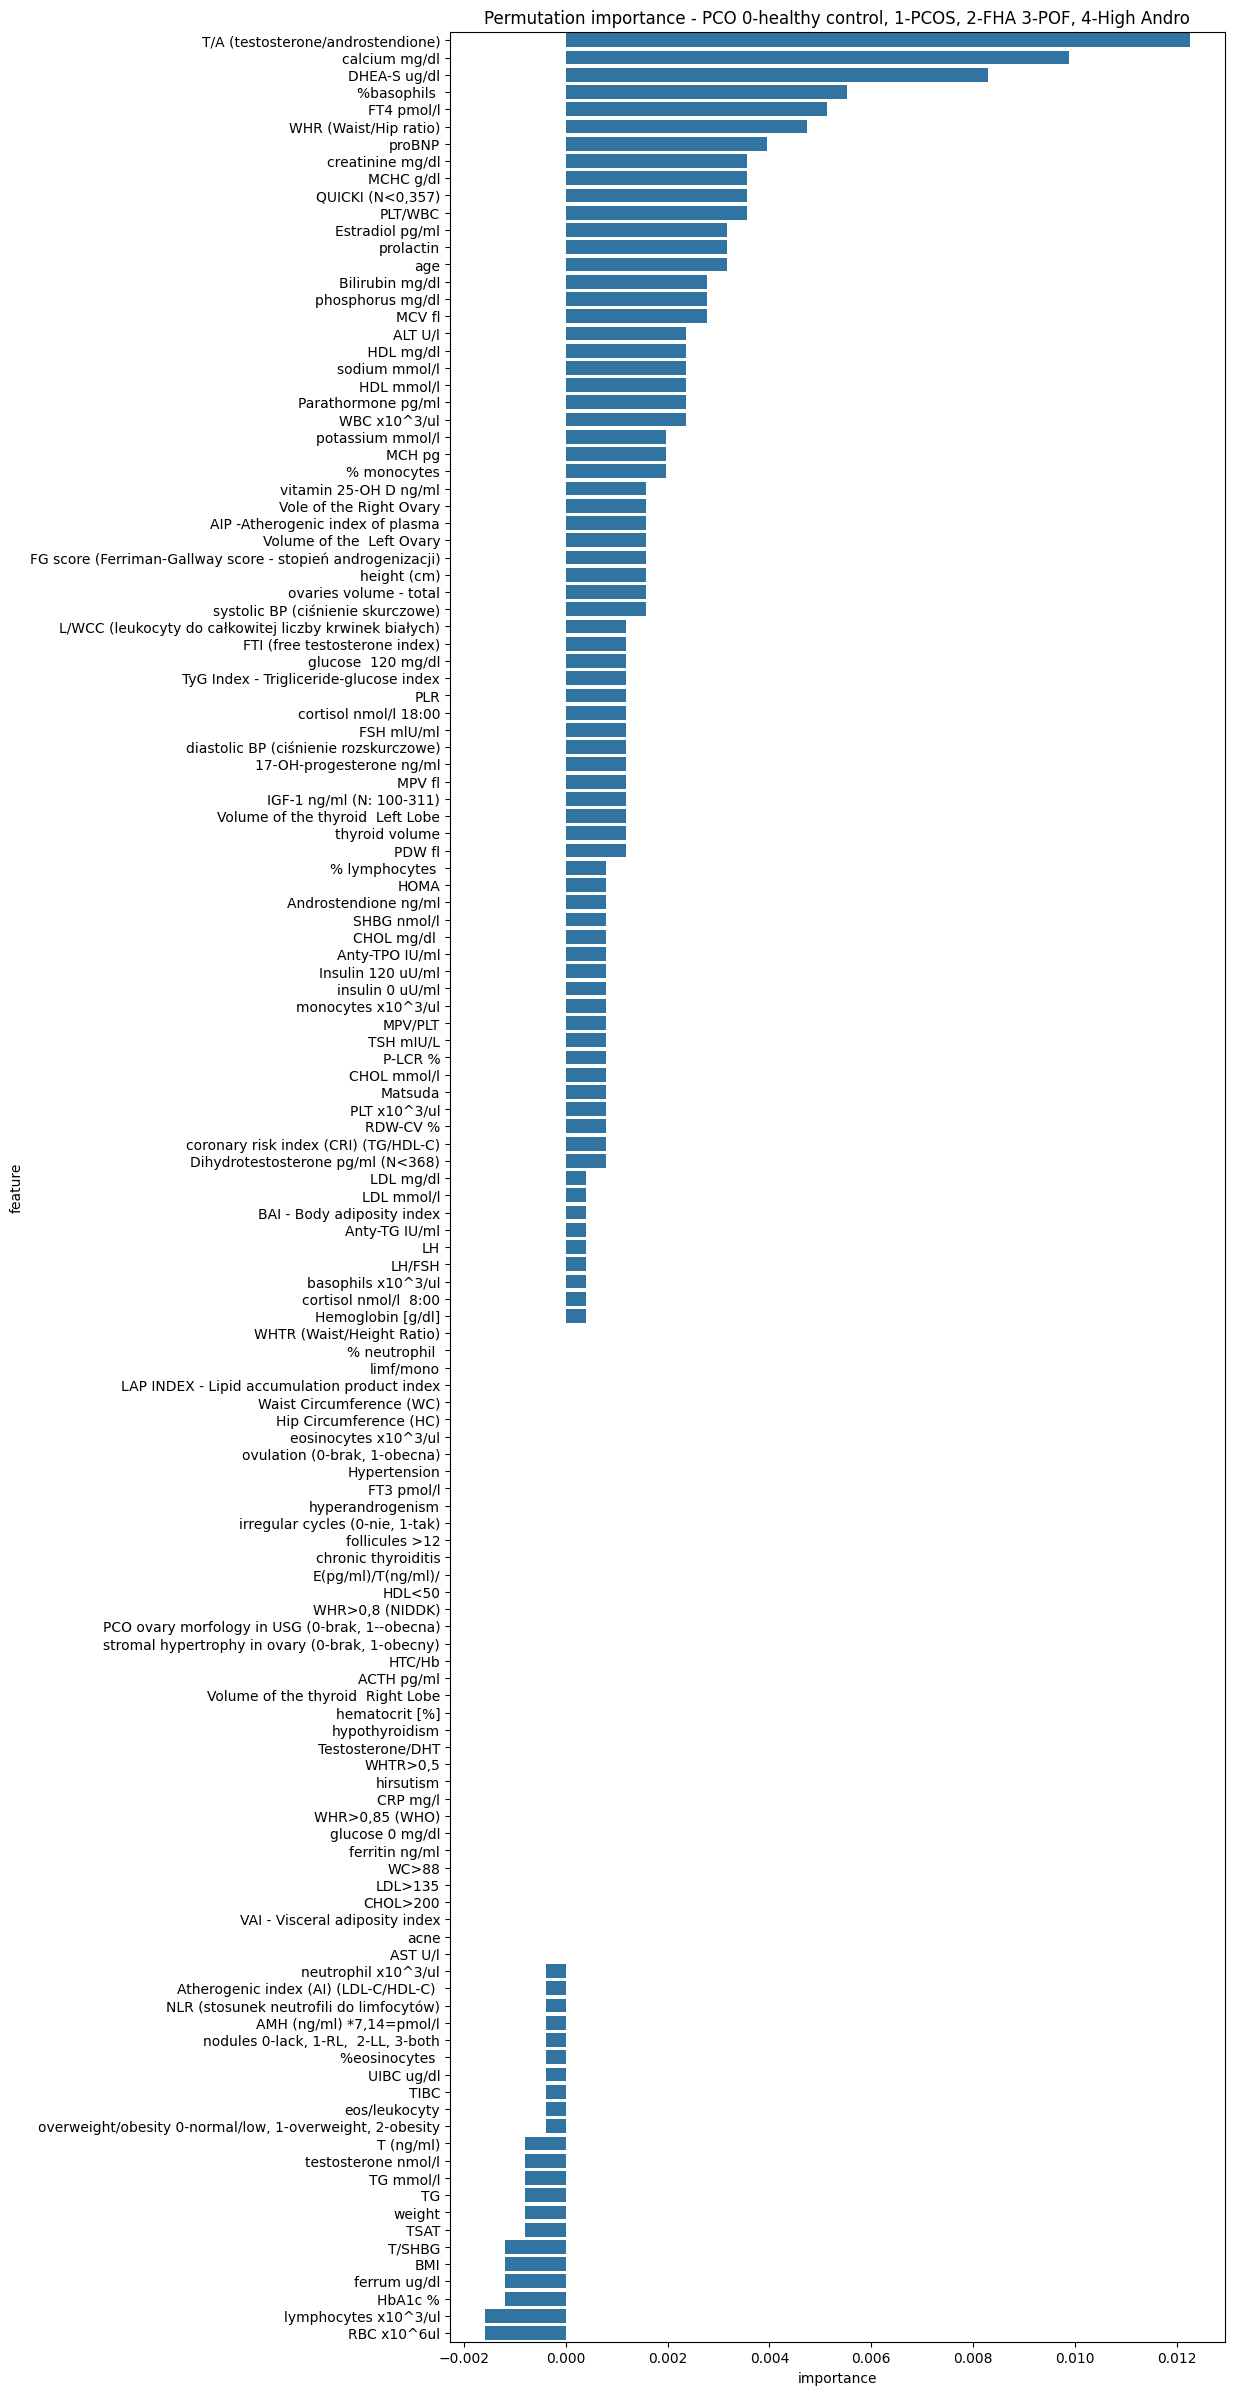

Actually selected 5 features


In [19]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [20]:
selected_features_map

{'average_rank': ['testosterone nmol/l',
  'T (ng/ml)',
  'DHEA-S ug/dl',
  'acne',
  'stromal hypertrophy in ovary (0-brak, 1-obecny)',
  'T/A (testosterone/androstendione)',
  'sodium mmol/l',
  'FTI (free testosterone index)',
  'P-LCR %',
  'MCV fl',
  'SHBG nmol/l',
  'calcium mg/dl',
  'PDW fl',
  'MPV fl',
  'creatinine mg/dl',
  'Androstendione ng/ml',
  'T/SHBG',
  'Estradiol pg/ml',
  'FT4 pmol/l',
  'age',
  'ALT U/l',
  'hirsutism',
  'prolactin',
  'MPV/PLT',
  'LDL mmol/l',
  'MCH pg',
  'Dihydrotestosterone pg/ml (N<368)',
  'irregular cycles (0-nie, 1-tak)',
  'LDL mg/dl',
  'hyperandrogenism',
  'proBNP',
  'Volume of the thyroid  Left Lobe',
  'systolic BP (ciśnienie skurczowe)',
  'QUICKI (N<0,357)',
  'cortisol nmol/l  8:00',
  'E(pg/ml)/T(ng/ml)/',
  'cortisol nmol/l 18:00',
  'HOMA',
  'Hemoglobin [g/dl]',
  'CRP mg/l',
  'glucose 0 mg/dl',
  'TSAT',
  'TSH mIU/L',
  'diastolic BP (ciśnienie rozskurczowe)',
  'WHTR (Waist/Height Ratio)',
  'BMI',
  '%basophils ',


In [21]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

2
['T/A (testosterone/androstendione)', 'DHEA-S ug/dl']


0
0  T/A (testosterone/androstendione)
1                       DHEA-S ug/dl

In [22]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

108
['thyroid volume', 'MCH pg', 'DHEA-S ug/dl', 'hematocrit [%]', 'FT3 pmol/l', 'PLR', 'AST U/l', 'VAI - Visceral adiposity index', 'Anty-TG IU/ml', 'CRP mg/l', 'WBC x10^3/ul', 'glucose 0 mg/dl', 'systolic BP (ciśnienie skurczowe)', 'cortisol nmol/l  8:00', 'TSH mIU/L', 'Insulin 120 uU/ml', 'WHR>0,85 (WHO)', 'HDL mmol/l', 'TSAT', '% lymphocytes ', 'MCV fl', 'T/A (testosterone/androstendione)', 'Volume of the thyroid  Right Lobe', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'NLR (stosunek neutrofili do limfocytów)', 'Vole of the Right Ovary', 'T/SHBG', 'CHOL>200', 'ovaries volume - total', 'eosinocytes x10^3/ul', 'chronic thyroiditis', 'Volume of the thyroid  Left Lobe', 'nodules 0-lack, 1-RL,  2-LL, 3-both', 'Androstendione ng/ml', 'proBNP', 'Hemoglobin [g/dl]', 'WHR (Waist/Hip ratio)', 'Parathormone pg/ml', 'ALT U/l', 'Hypertension', 'ferrum ug/dl', 'LDL mmol/l', 'glucose  120 mg/dl', 'Bilirubin mg/dl', 'follicules >12', 'WHTR>0,5', 'UIBC ug/dl', 'E(pg/ml)/T(ng/ml)/

## Test the narrowed down feature space

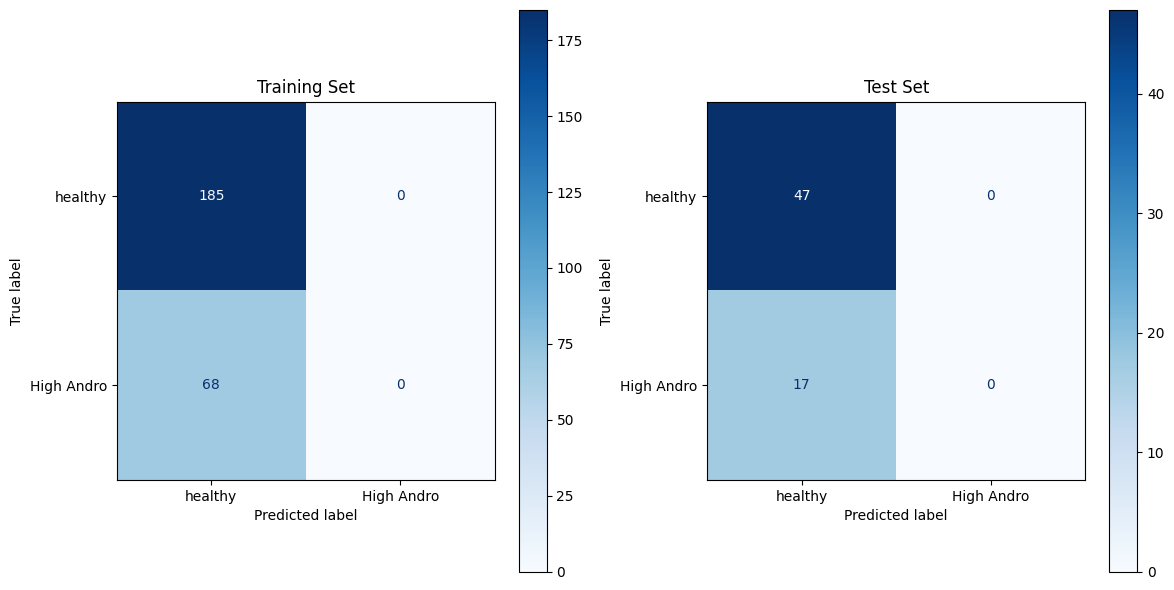

Training set
              precision    recall  f1-score   support

     healthy       0.73      1.00      0.84       185
  High Andro       0.00      0.00      0.00        68

    accuracy                           0.73       253
   macro avg       0.37      0.50      0.42       253
weighted avg       0.53      0.73      0.62       253

Test set
              precision    recall  f1-score   support

     healthy       0.73      1.00      0.85        47
  High Andro       0.00      0.00      0.00        17

    accuracy                           0.73        64
   macro avg       0.37      0.50      0.42        64
weighted avg       0.54      0.73      0.62        64



c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

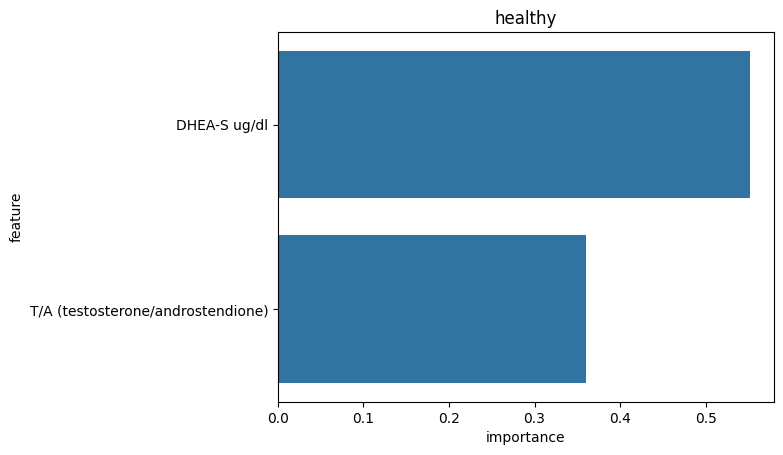

In [28]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

In [25]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

ValueError: A given column is not a column of the dataframe

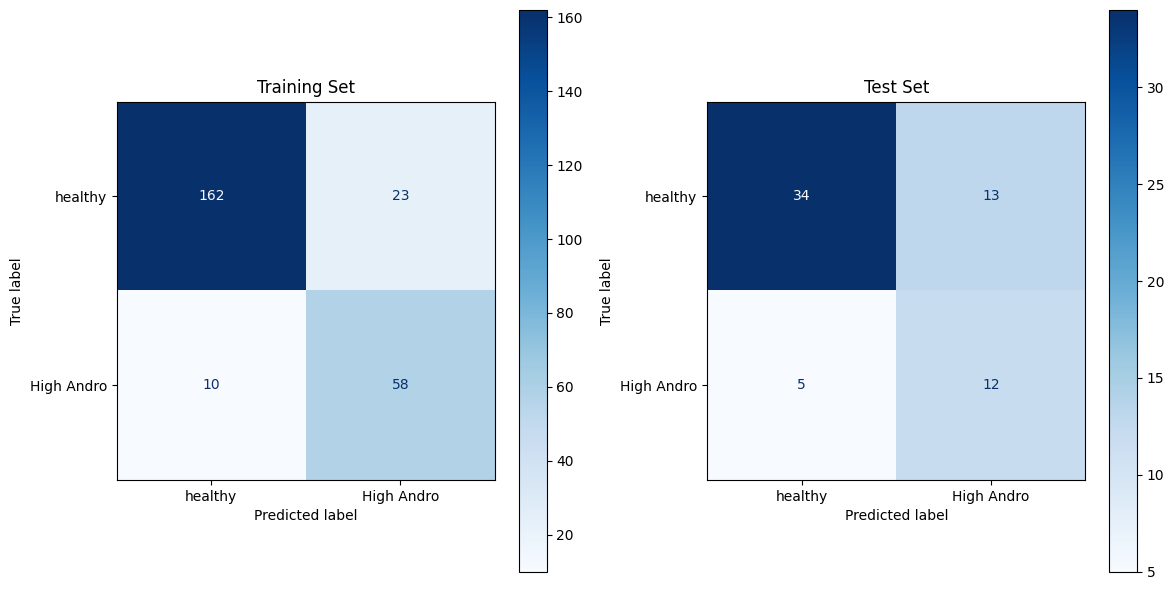

Training set
              precision    recall  f1-score   support

     healthy       0.94      0.88      0.91       185
  High Andro       0.72      0.85      0.78        68

    accuracy                           0.87       253
   macro avg       0.83      0.86      0.84       253
weighted avg       0.88      0.87      0.87       253

Test set
              precision    recall  f1-score   support

     healthy       0.87      0.72      0.79        47
  High Andro       0.48      0.71      0.57        17

    accuracy                           0.72        64
   macro avg       0.68      0.71      0.68        64
weighted avg       0.77      0.72      0.73        64



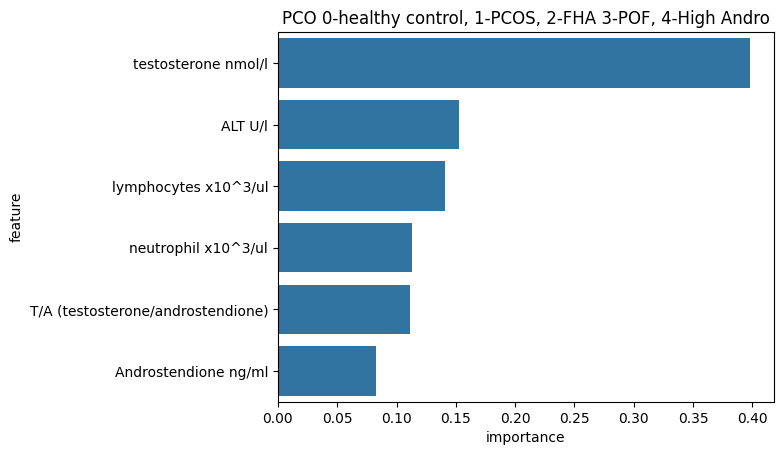

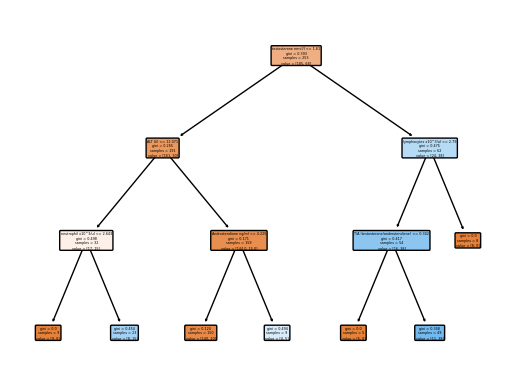

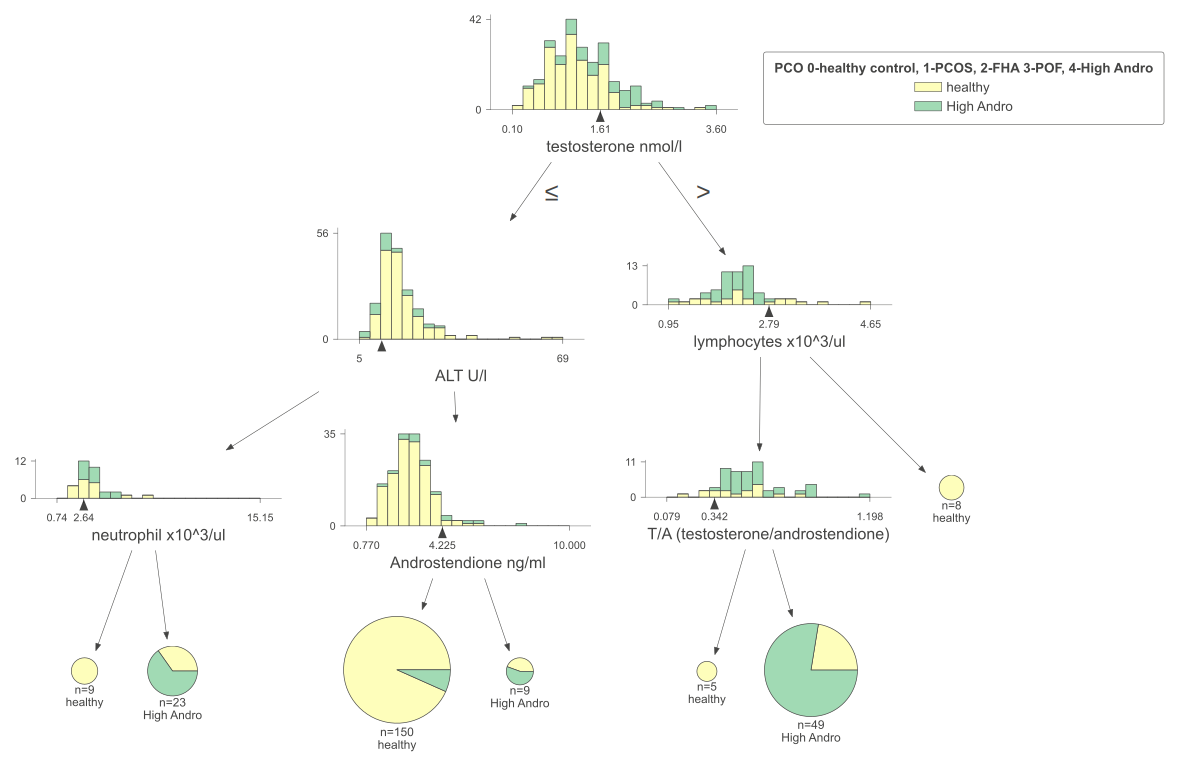

In [26]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=5, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

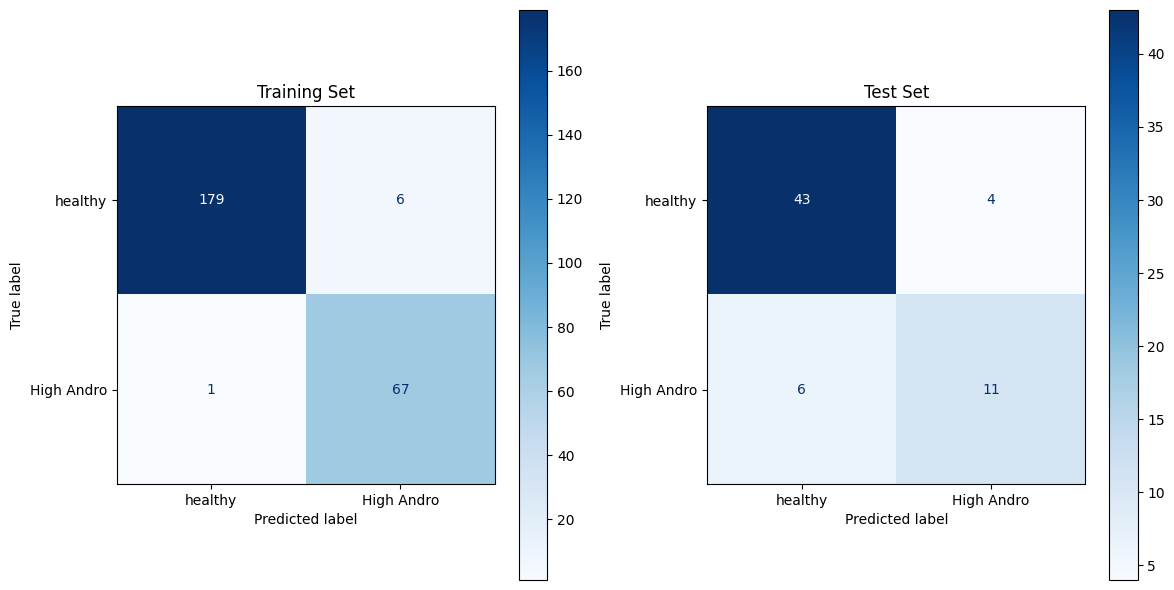

Training set
              precision    recall  f1-score   support

     healthy       0.99      0.97      0.98       185
  High Andro       0.92      0.99      0.95        68

    accuracy                           0.97       253
   macro avg       0.96      0.98      0.97       253
weighted avg       0.97      0.97      0.97       253

Test set
              precision    recall  f1-score   support

     healthy       0.88      0.91      0.90        47
  High Andro       0.73      0.65      0.69        17

    accuracy                           0.84        64
   macro avg       0.81      0.78      0.79        64
weighted avg       0.84      0.84      0.84        64



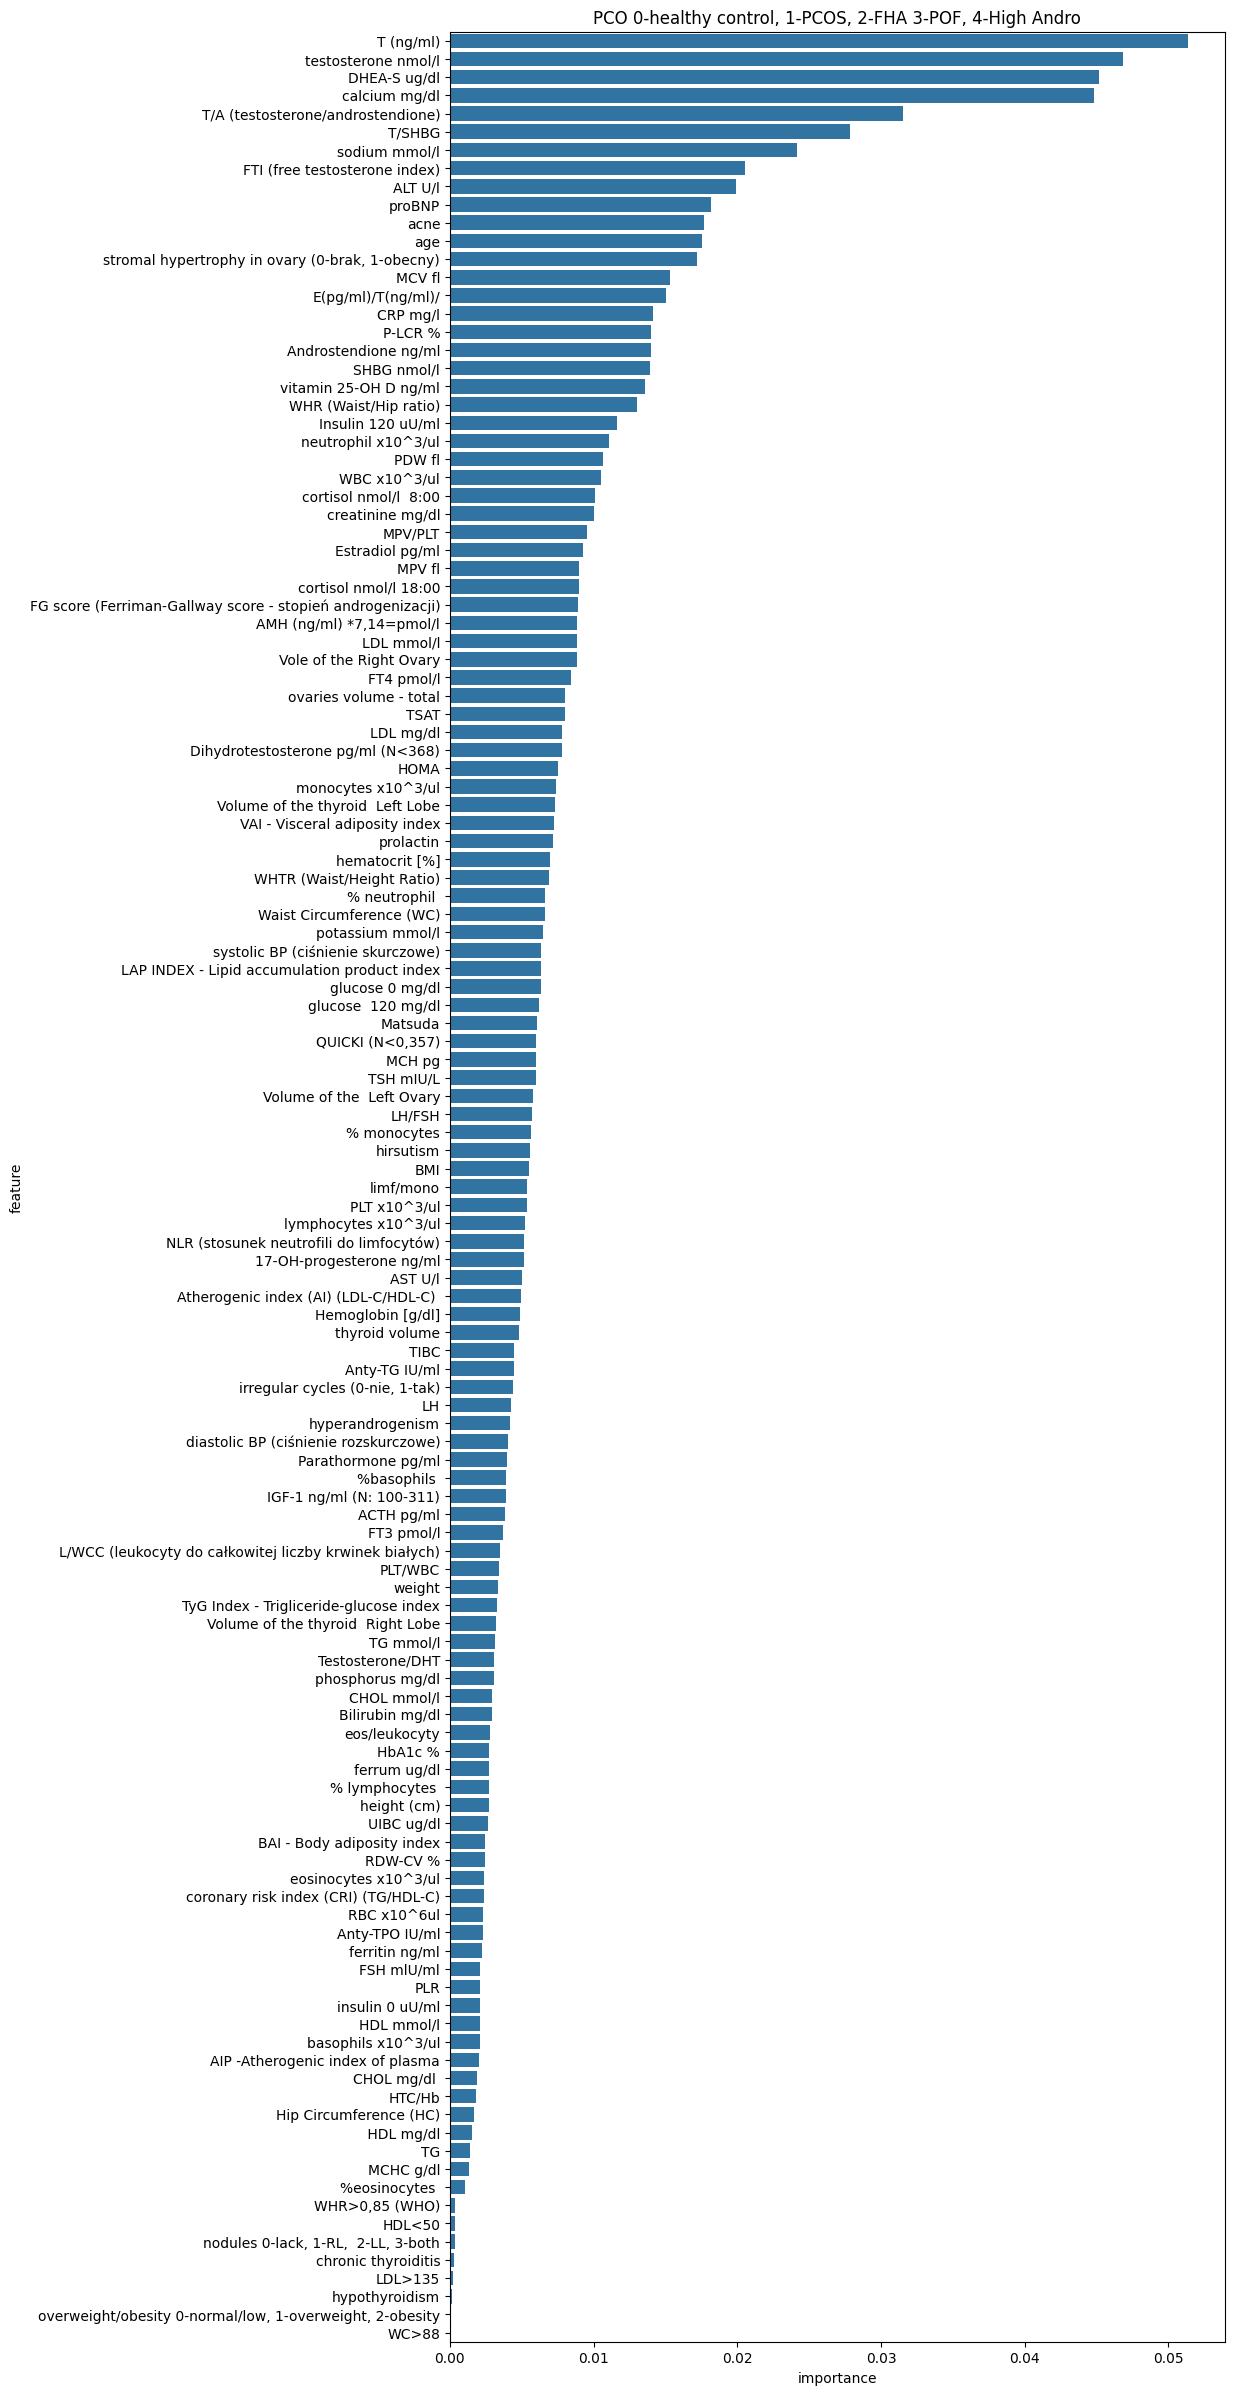

In [27]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)